Import all the necessary libraries.

In [300]:
import numpy as np
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import plotly as plotly
plotly.offline.init_notebook_mode()

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from keras.utils import to_categorical
from keras.models import load_model

from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve

# Framing the problem

The goal of this lab is to run a good EDA on fMNIST, train a neural network using Tensorflow, evaluate it using sklearn, and provide clear conclusions.

# Getting the data

For this report, we will get the data from [Kaaggle.](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv). The dataset are already separated into test and train sets.

In [301]:
train = pd.read_csv('../../dataset/fashion-mnist_train.csv')
test = pd.read_csv('../../dataset/fashion-mnist_test.csv')
display(train.head())
display(test.head())

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0      2       0       0       0       0       0       0       0       0  \
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0       0  ...         0         0         0         0         0         0  \
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0      0       0       0       0       0       0       0       0       9  \
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0       8  ...       103        87        56         0         0         0  \
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

# Exploratory Data Analysis

## Exploring and Describing the data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Now let us take a look at our data.

In [302]:
# combine the train and test data
data = pd.concat([train, test], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0          2       0       0       0       0       0       0       0       0  \
1          5       0       0       0       0       0       0       0       0   
2          3       0       0       0       0       0       0       0       0   
3          8       0       0       0       0       0       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995      3       0       0       0       0       0       0       0       0   
69996      8       0       0       0       0       0       0       0       0   
69997      8       0       0       0      52      70      70      74      81   
69998      7       0       0       0       0       0       0       0       0   
69999      0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0           0  ...         0         0         0         0        71  \
1           0  ...         0         0         0         0         0   
2           0  ...        39         0         0         0         0   
3           0  ...        91        89        83        73        57   
4           0  ...         0         0         2         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
69995       4  ...        71       112         0         0         2   
69996       0  ...         0         0         0         0         0   
69997      87  ...         0         0         0         0         0   
69998       0  ...         0         0         0         0         0   
69999       0  ...        21        14        14         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           128        29         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3            47        34        43         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         1         1         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 785 columns]

As we can see, our dataset set consists of 70,000 rows and 785 columns (1 label column and 784 features).

Each feature column represents a single pixel on a 28 by 28 image frame.

The value of each column on a given sample is the "degree of blackness/whiteness" of the pixel, a value from 0 to 256.

In [303]:
# split the data into features and target
X = data.drop('label', axis=1)
y = data['label']

y

0        2
1        5
2        3
3        8
4        3
        ..
69995    3
69996    8
69997    8
69998    7
69999    0
Name: label, Length: 70000, dtype: int64

Our target is a label of digits 1 to 9, representing a clothing item.

Let us visualize this below. To display our features, we will need to reshape the row and render it in image form.

In [304]:
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0           0       0       0       0       0       0       0       0       0  \
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       4   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0      52      70      70      74      81      87   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0            0  ...         0         0         0         0        71  \
1            0  ...         0         0         0         0         0   
2            0  ...        39         0         0         0         0   
3            0  ...        91        89        83        73        57   
4            4  ...         0         0         2         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      109  ...        71       112         0         0         2   
69996        0  ...         0         0         0         0         0   
69997       87  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        1  ...        21        14        14         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           128        29         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3            47        34        43         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         1         1         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

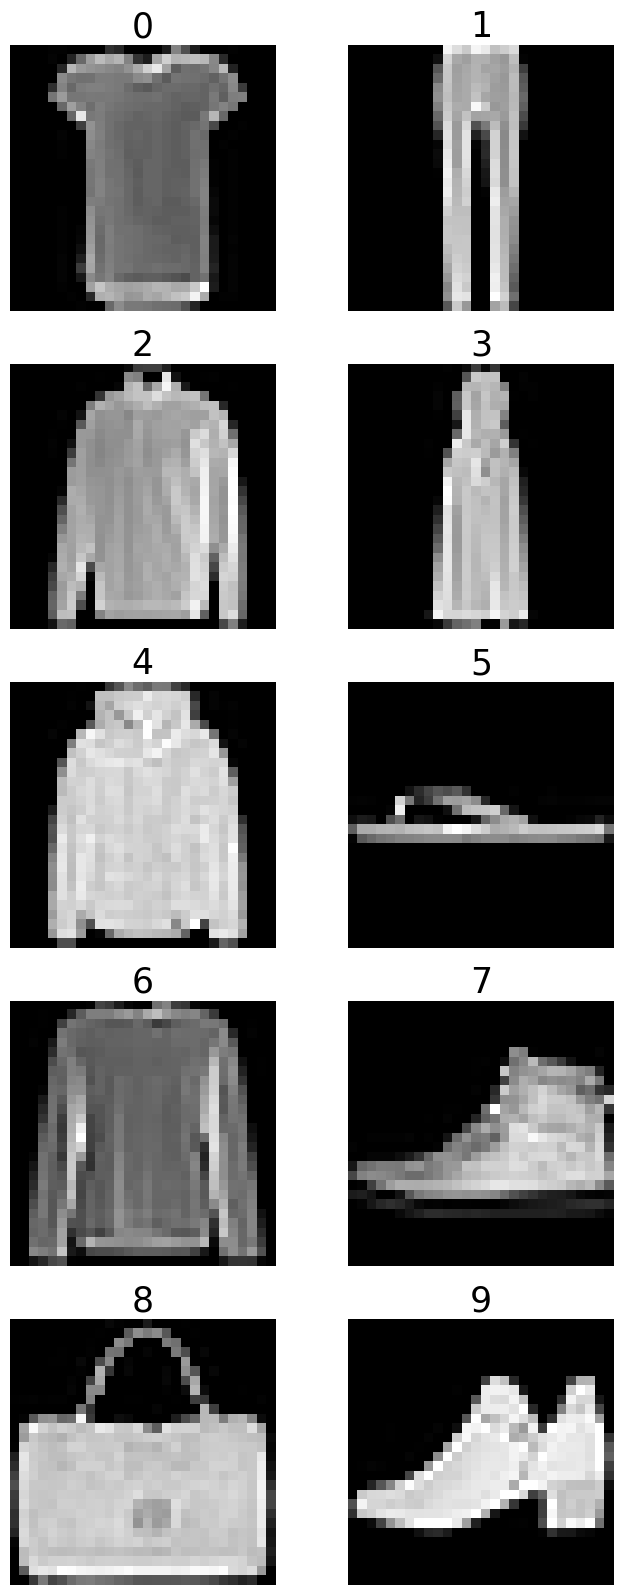

In [305]:
fig , axes  = plt.subplots(5, 2, figsize=(8,20))
axes   = axes.flatten()

# Create a dictionary that maps each unique label to its first occurrence
label_to_first_occurrence = {label: np.where(y == label)[0][0] for label in np.unique(y)}

# Sort the dictionary by key to ensure consistent ordering
label_to_first_occurrence = dict(sorted(label_to_first_occurrence.items()))

# Get the indices of the first 10 unique labels
idx = list(label_to_first_occurrence.values())[:10]

for i in range(10):
    img = X.iloc[idx[i], :].to_numpy().reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y[idx[i]])), color='black', fontsize=25)
plt.show()

and now the corresponding item name.

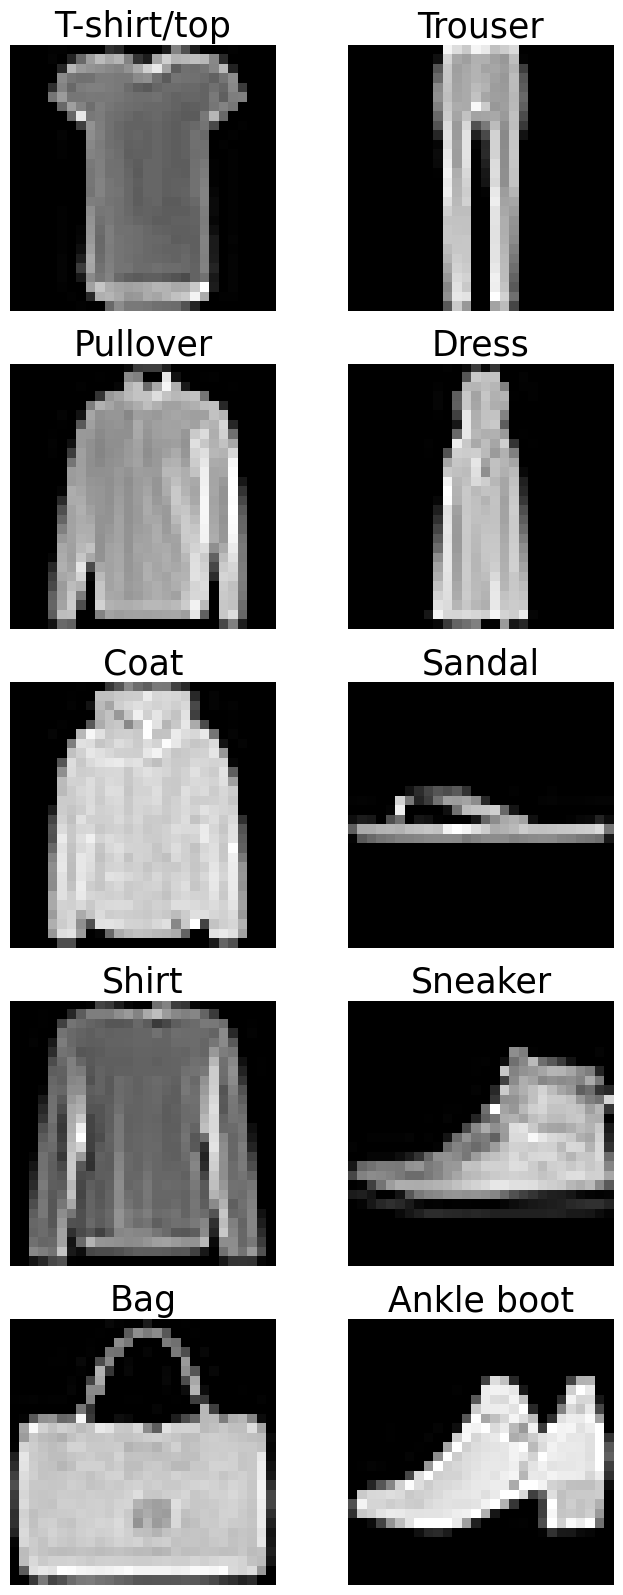

In [306]:
fig , axes  = plt.subplots(5, 2, figsize=(8,20))
axes   = axes.flatten()

label_to_first_occurrence = {label: np.where(y == label)[0][0] for label in np.unique(y)}

label_to_first_occurrence = dict(sorted(label_to_first_occurrence.items()))

idx = list(label_to_first_occurrence.values())[:10]

label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

for i in range(10):
    img = X.iloc[idx[i], :].to_numpy().reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    label_number = int(y[idx[i]])
    axes[i].set_title(label_names[label_number], color='black', fontsize=25)
plt.show()

In [307]:
def visualize_input(i, ax, y):
    img = X.iloc[i].to_numpy().reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{label_names[y[i]]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])



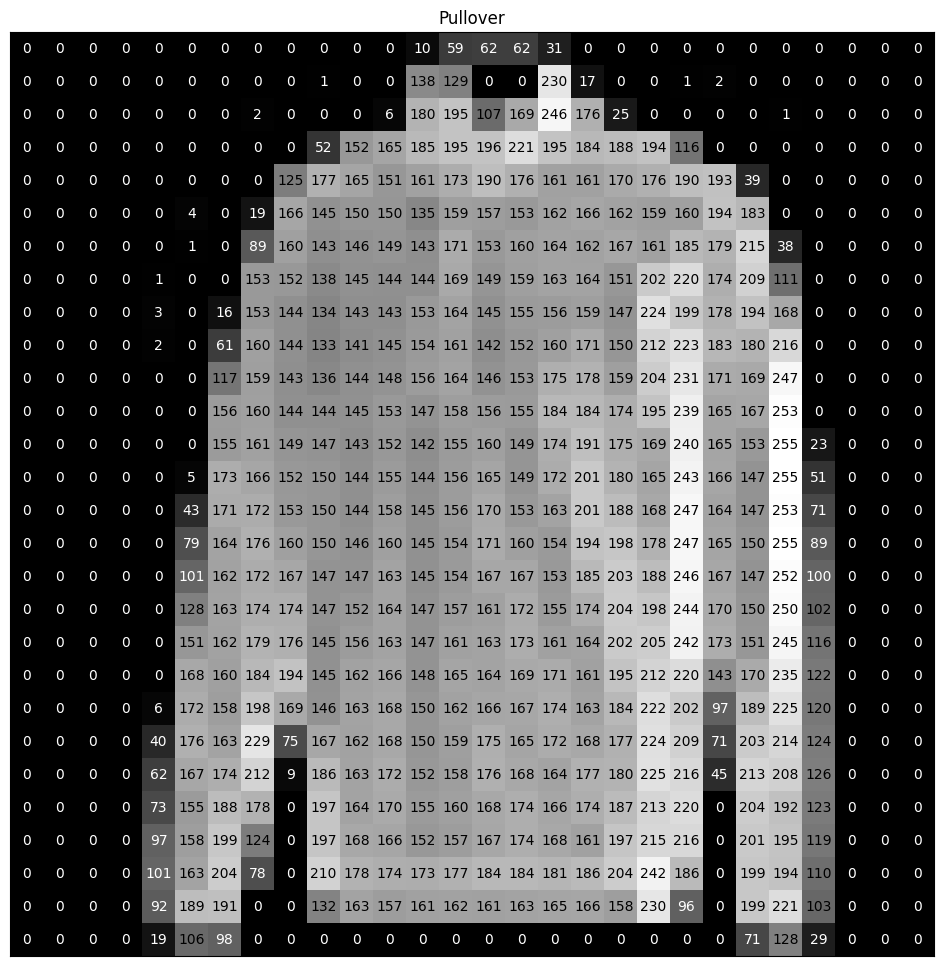

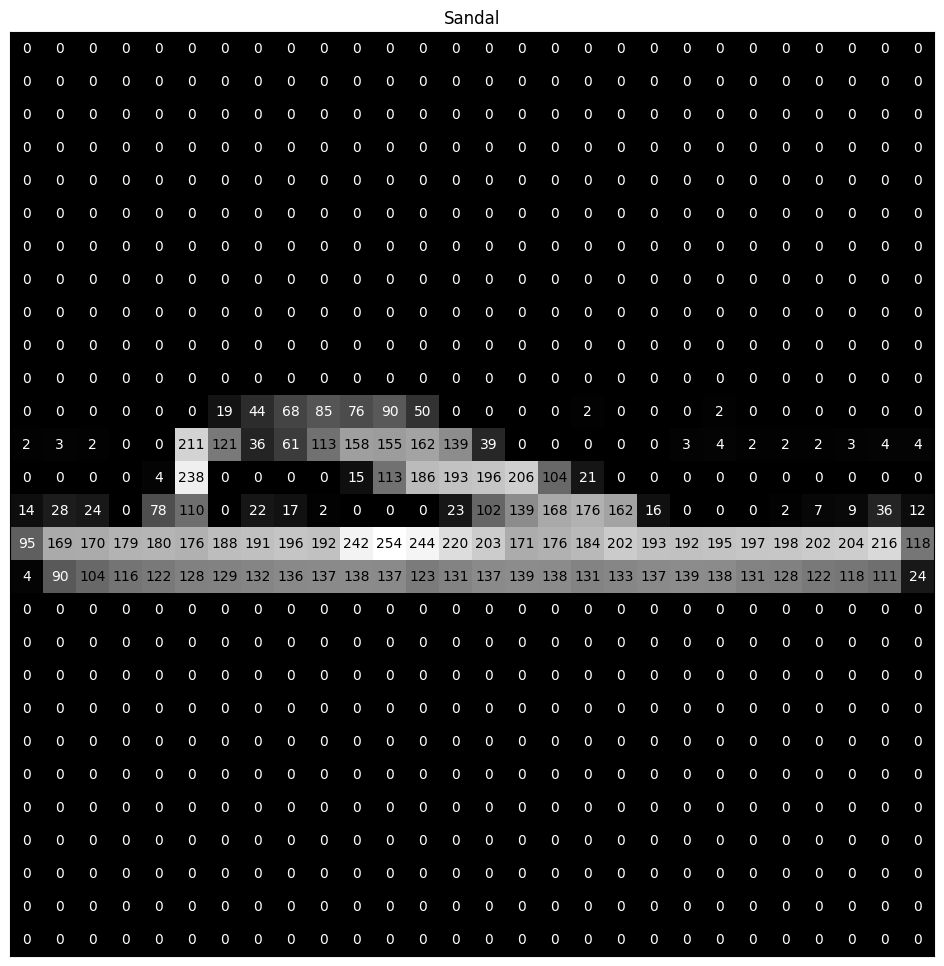

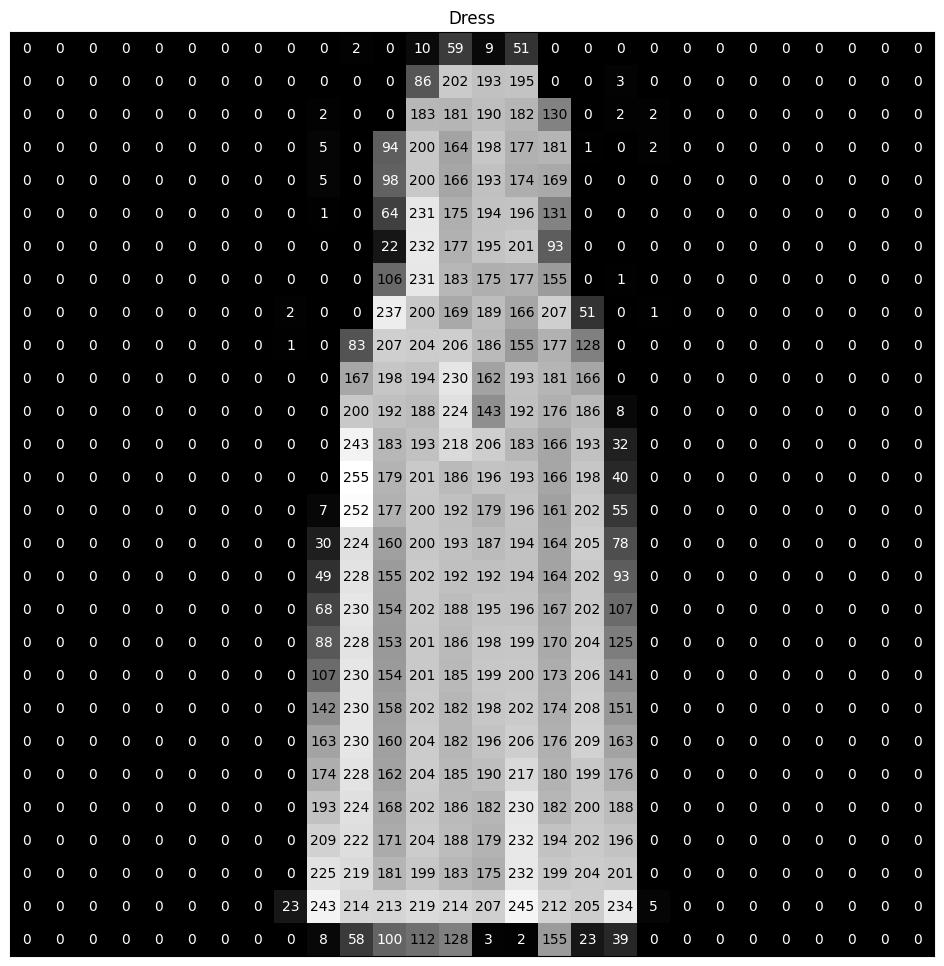

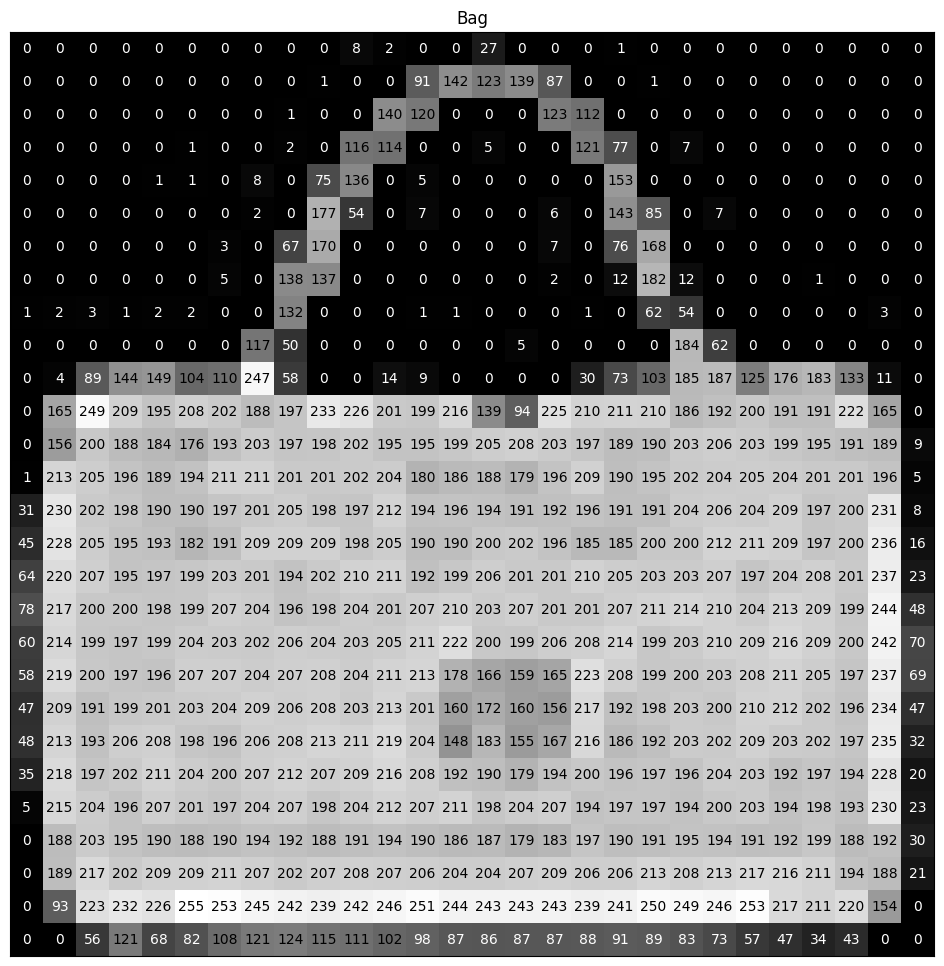

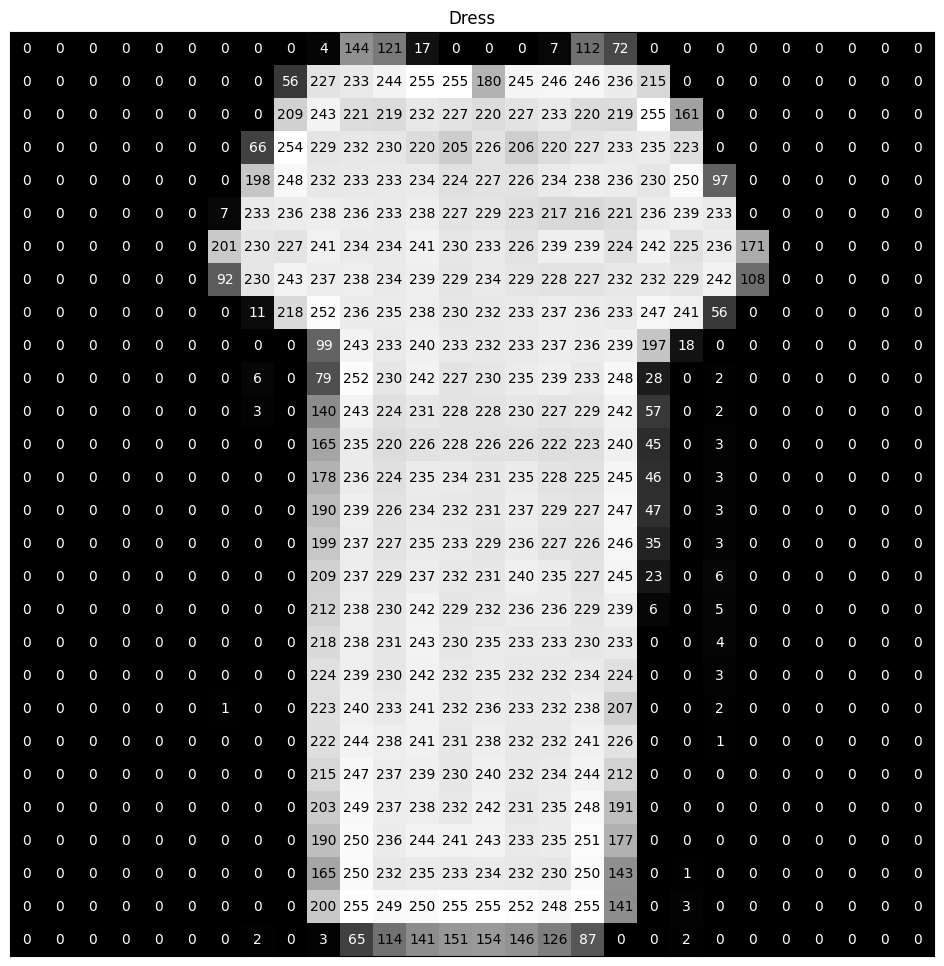

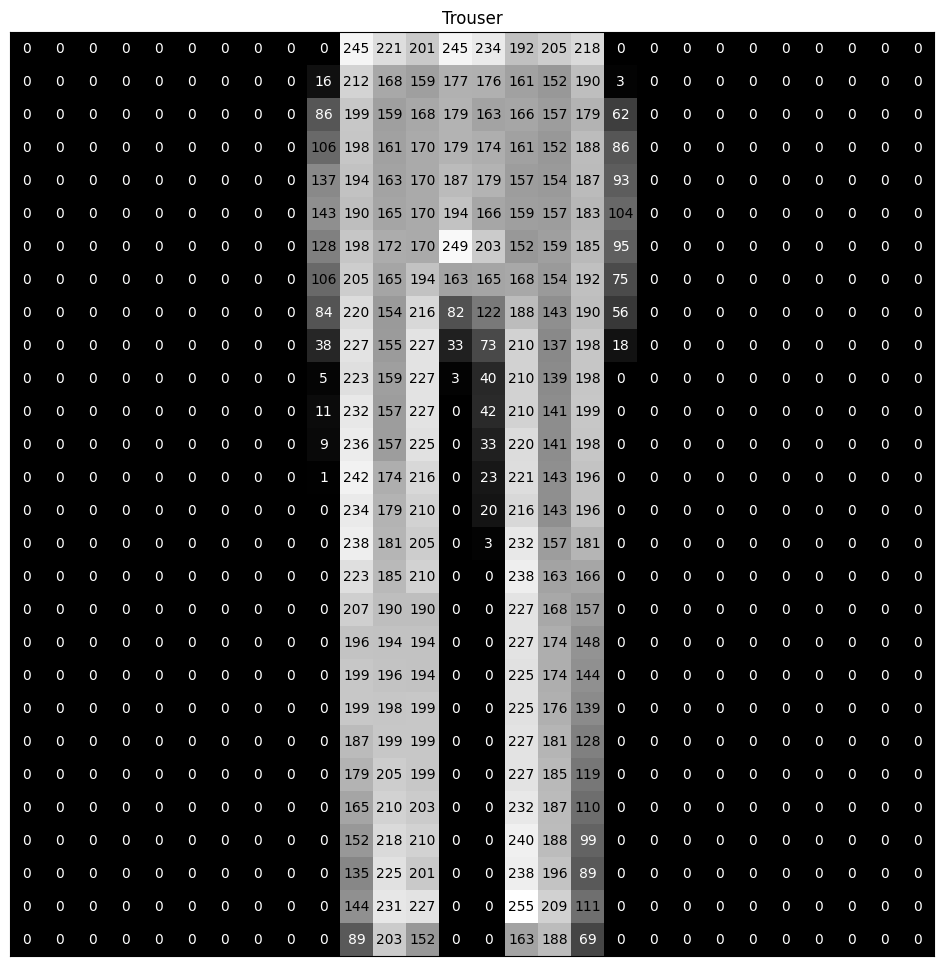

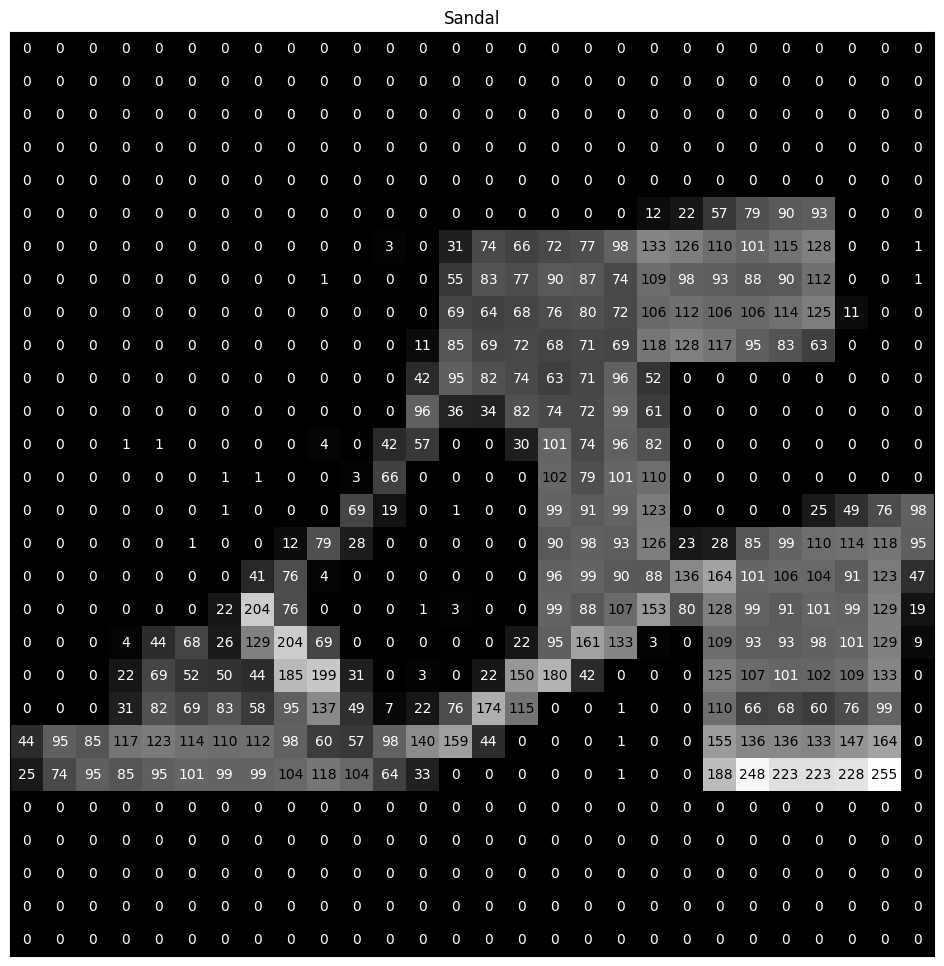

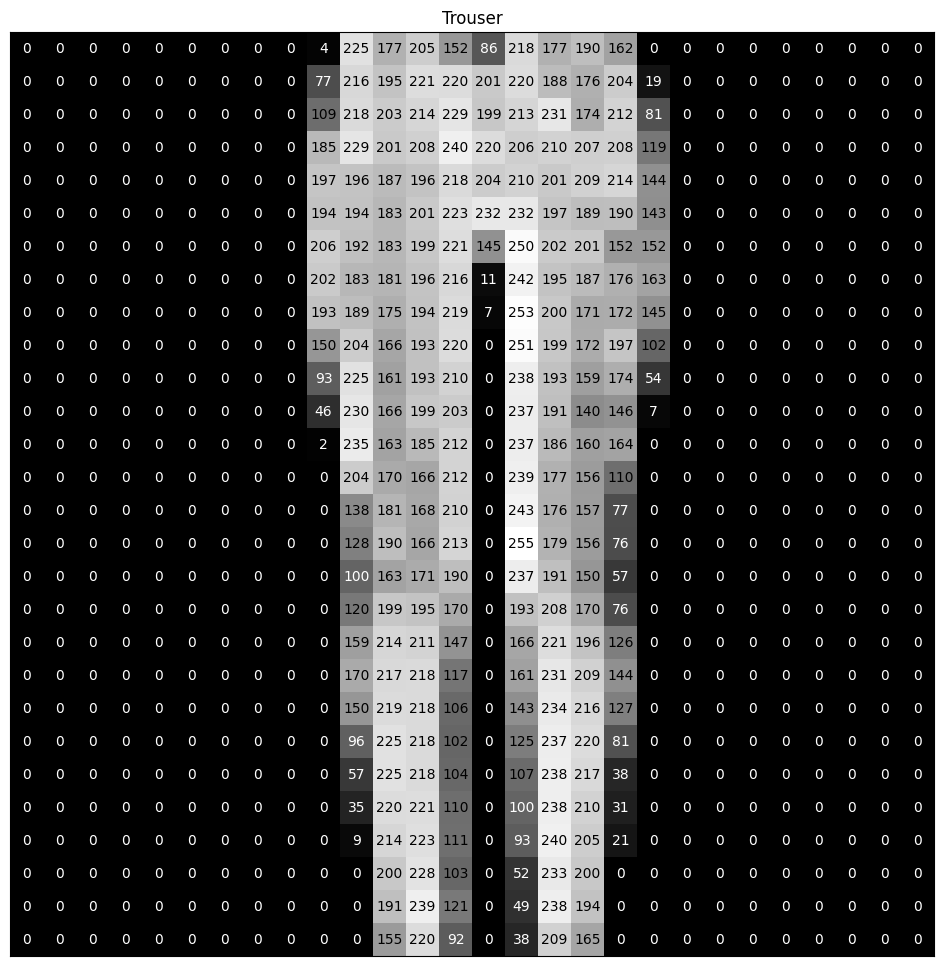

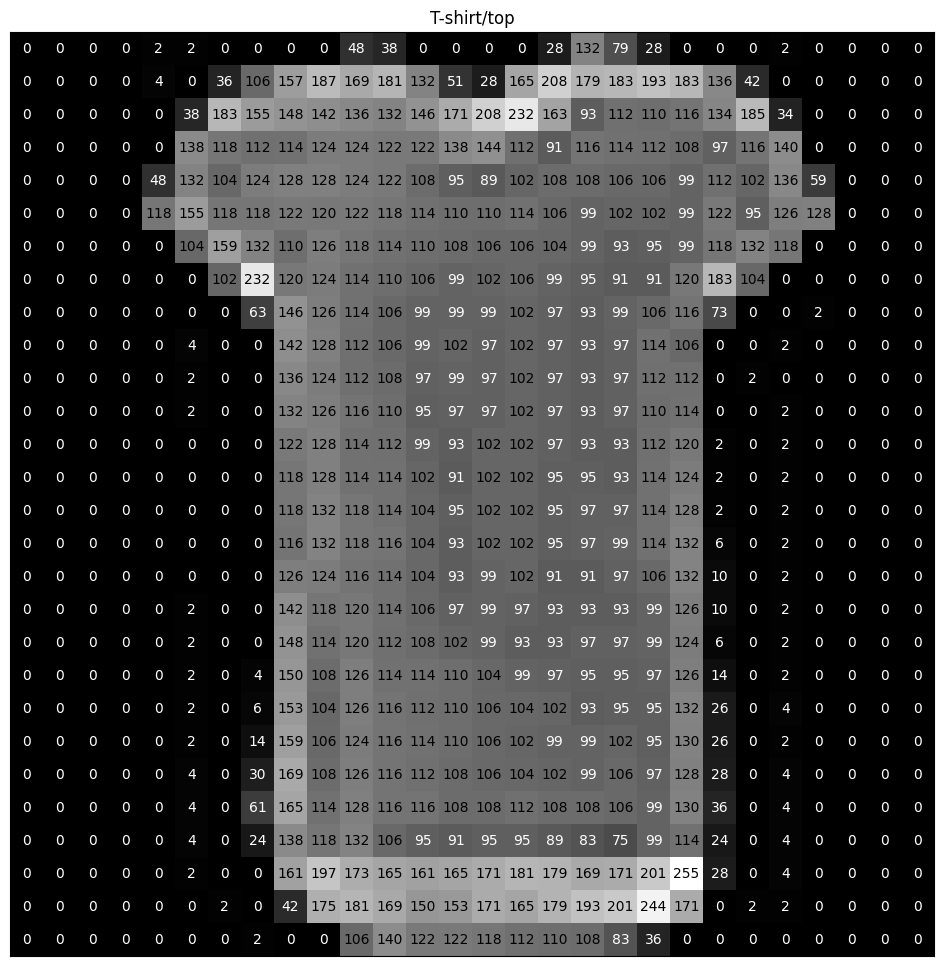

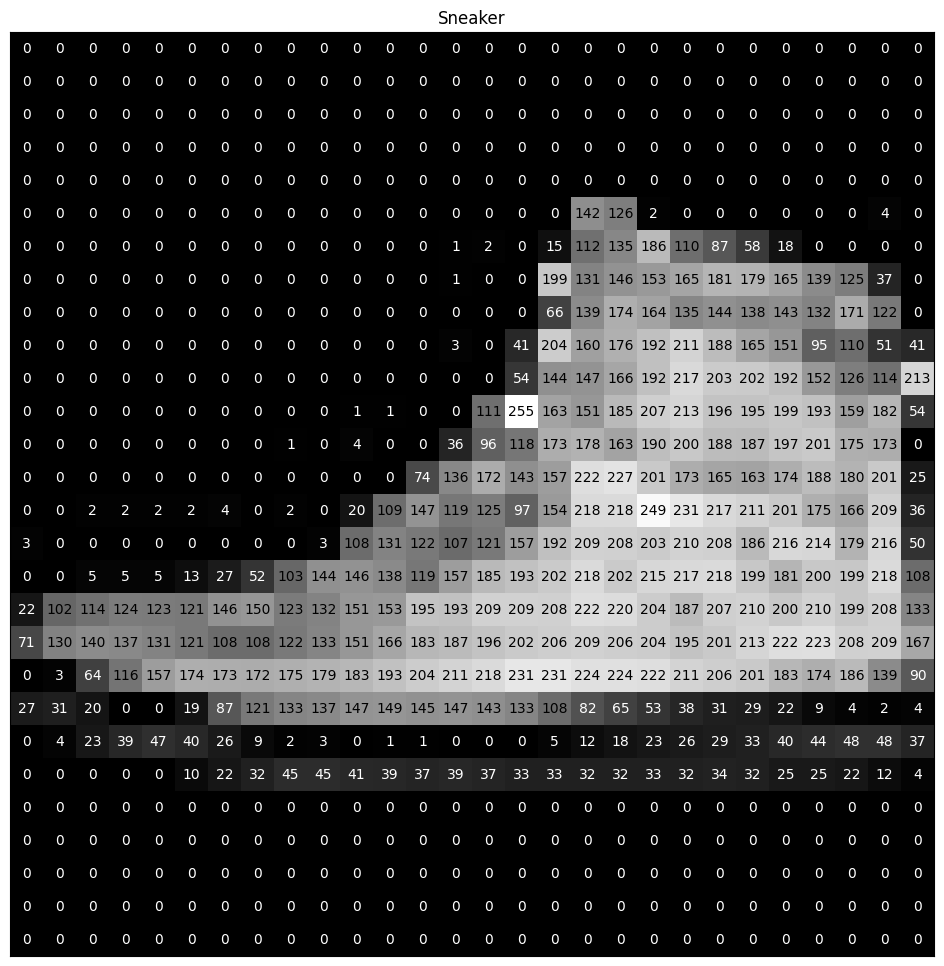

In [308]:
for i in range(10):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, y)
    
    

In [309]:
import plotly.express as px

# Create a new column in the DataFrame that maps the numerical labels to their names
data['label_name'] = data['label'].map(label_names) + ' (' + data['label'].astype(str) + ')'

# Create the pie chart
fig = px.pie(data, names='label_name', title='Distribution of the labels')

# Make the chart bigger
fig.update_layout(width=800, height=800)

fig.show()

Our labels are evenly distributed. We have an equal number of samples for each of the classes.

Text(0.5, 1.0, 'Distribution of pixel values in the first image')

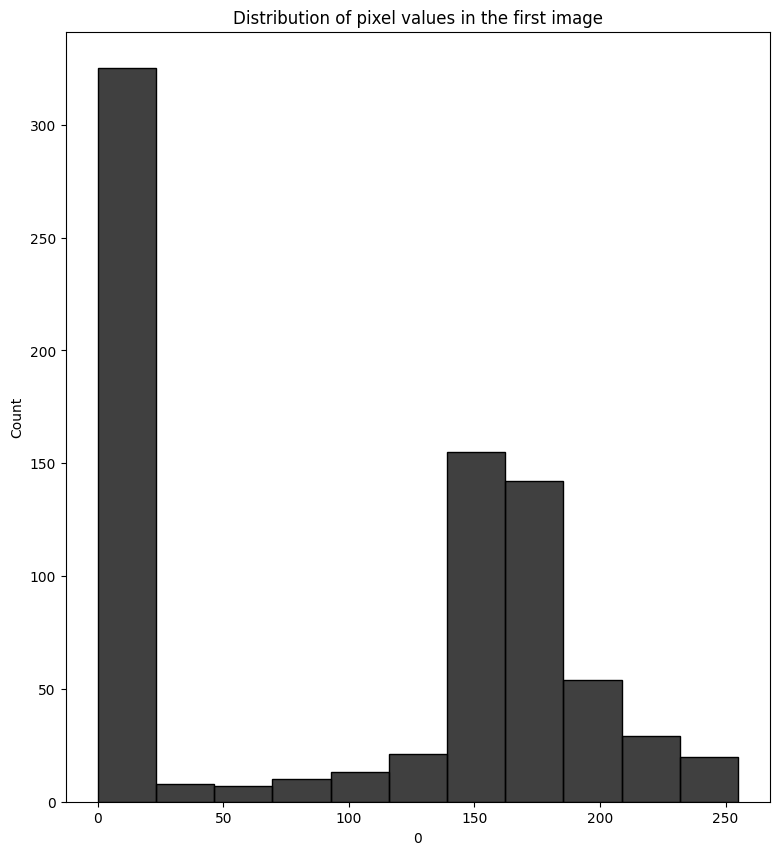

In [310]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.histplot(X.iloc[0], color='black')
plt.title('Distribution of pixel values in the first image')


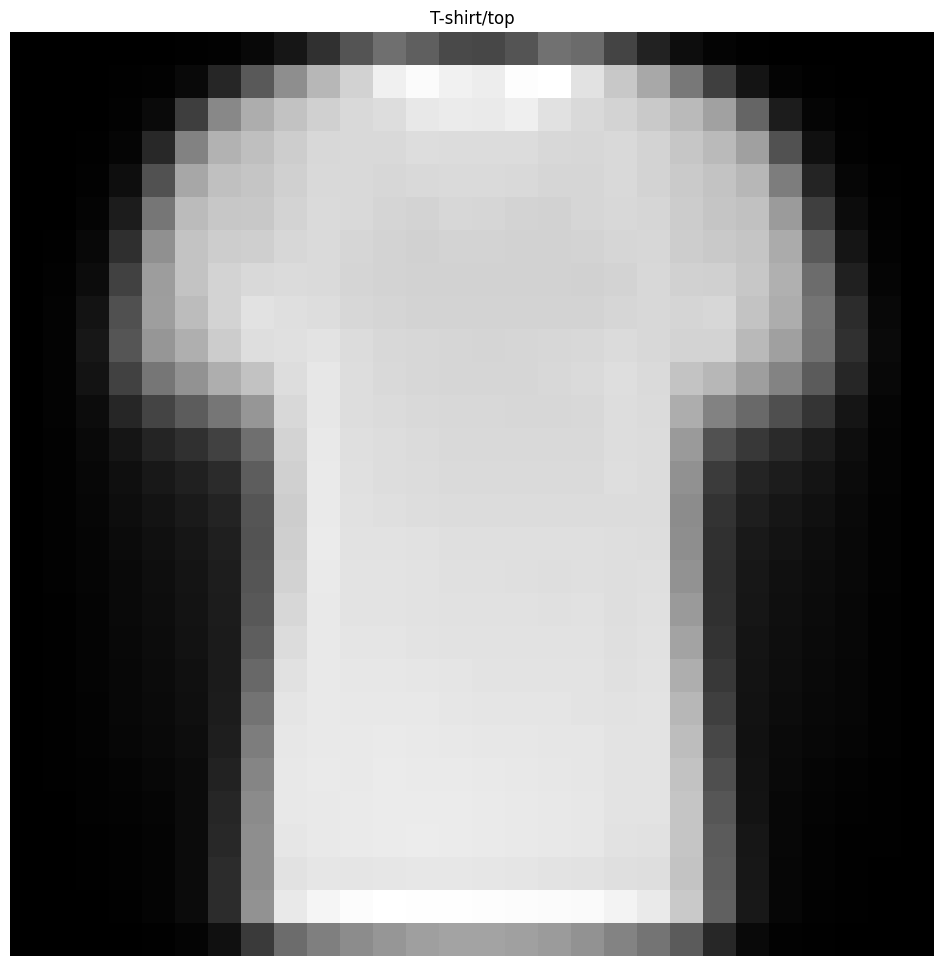

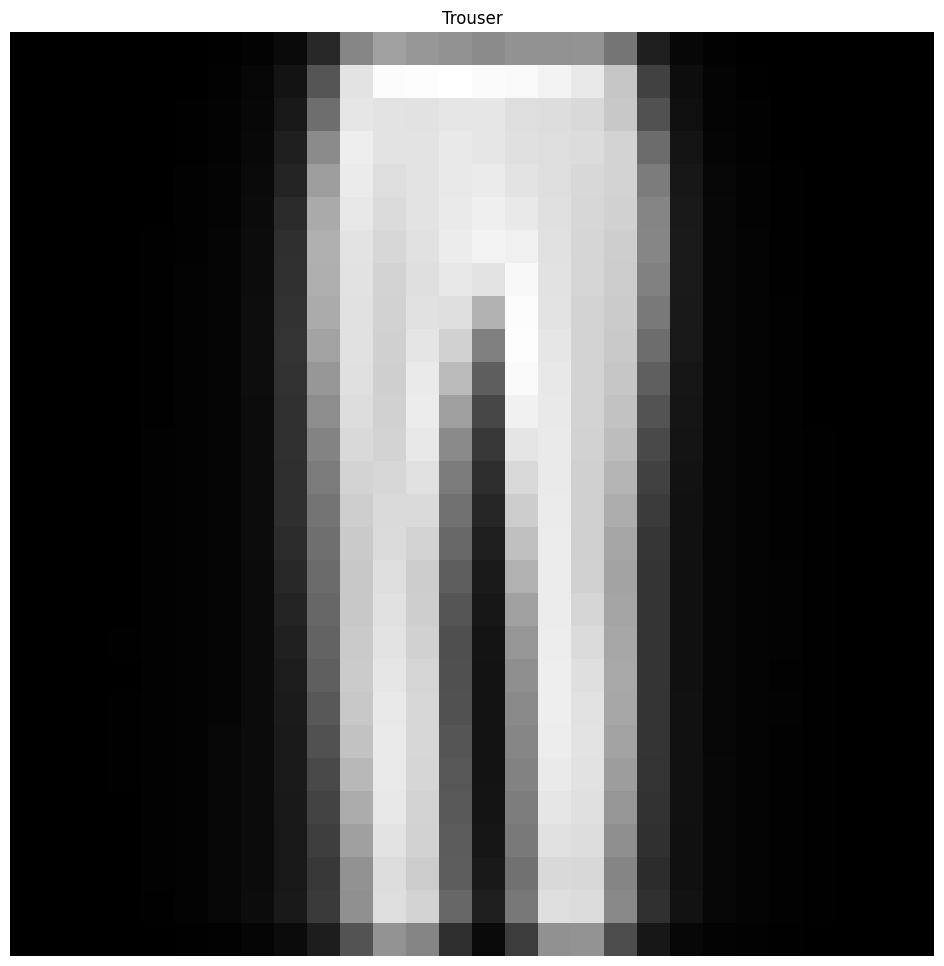

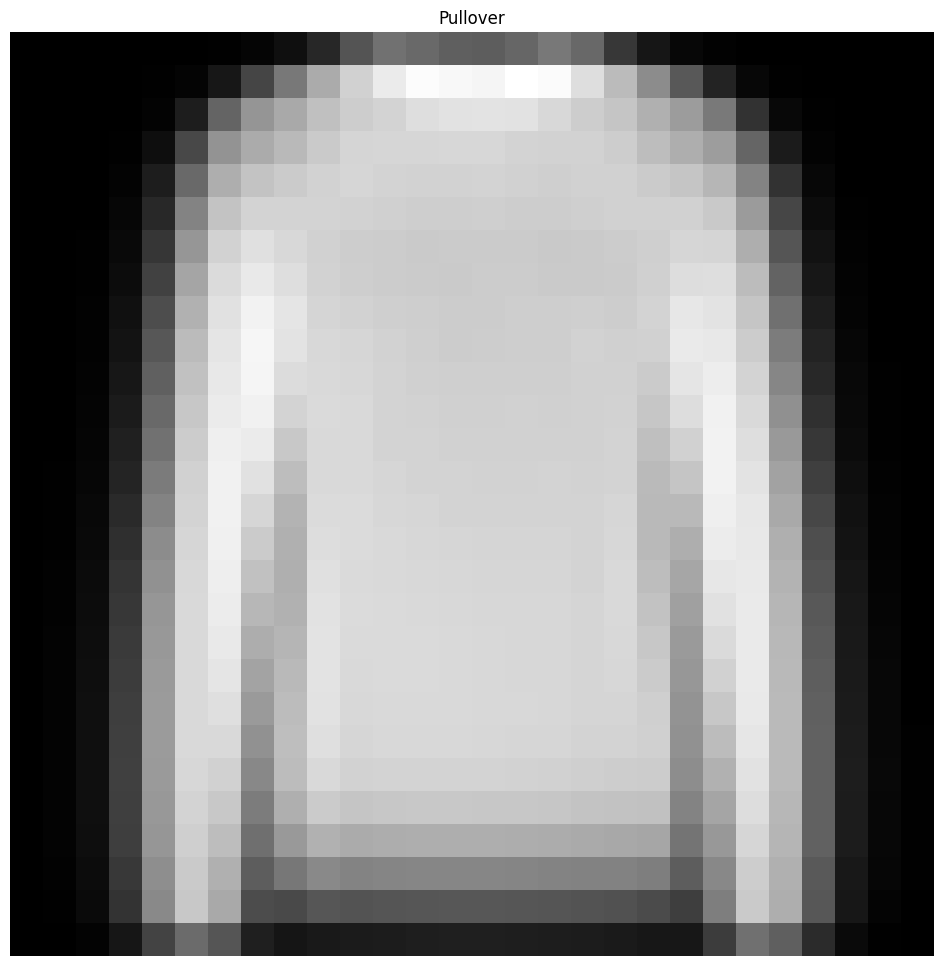

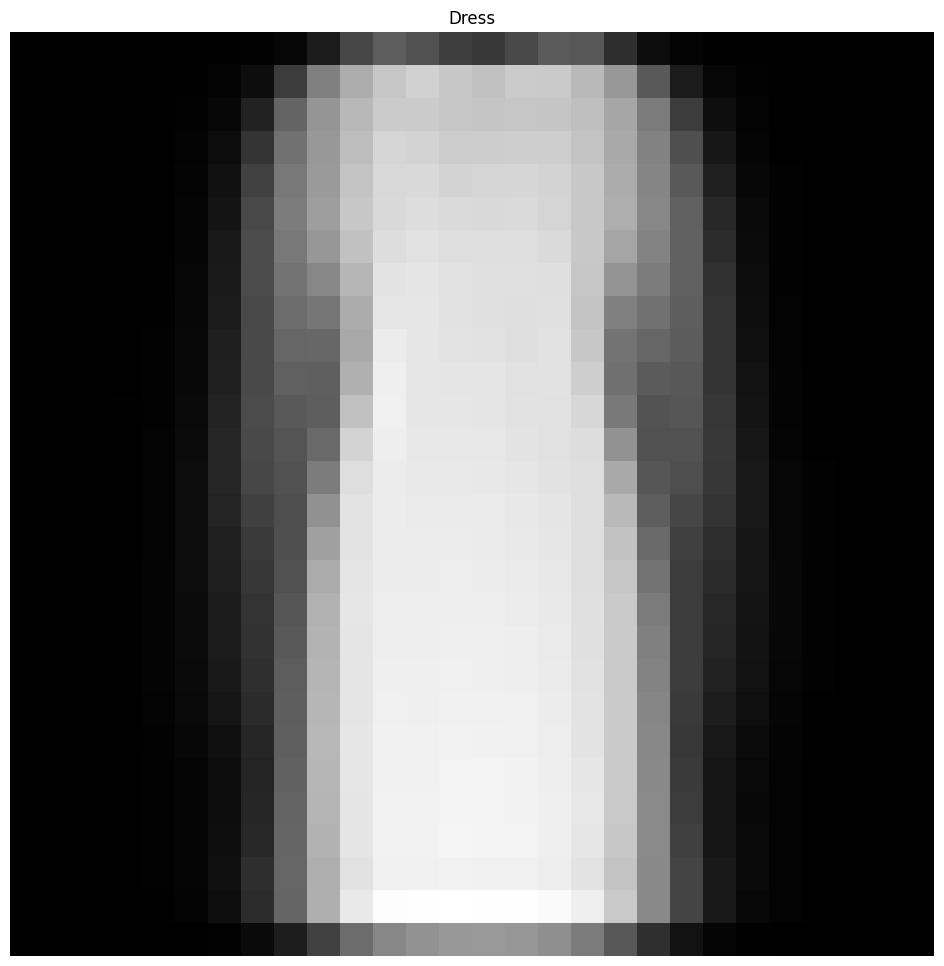

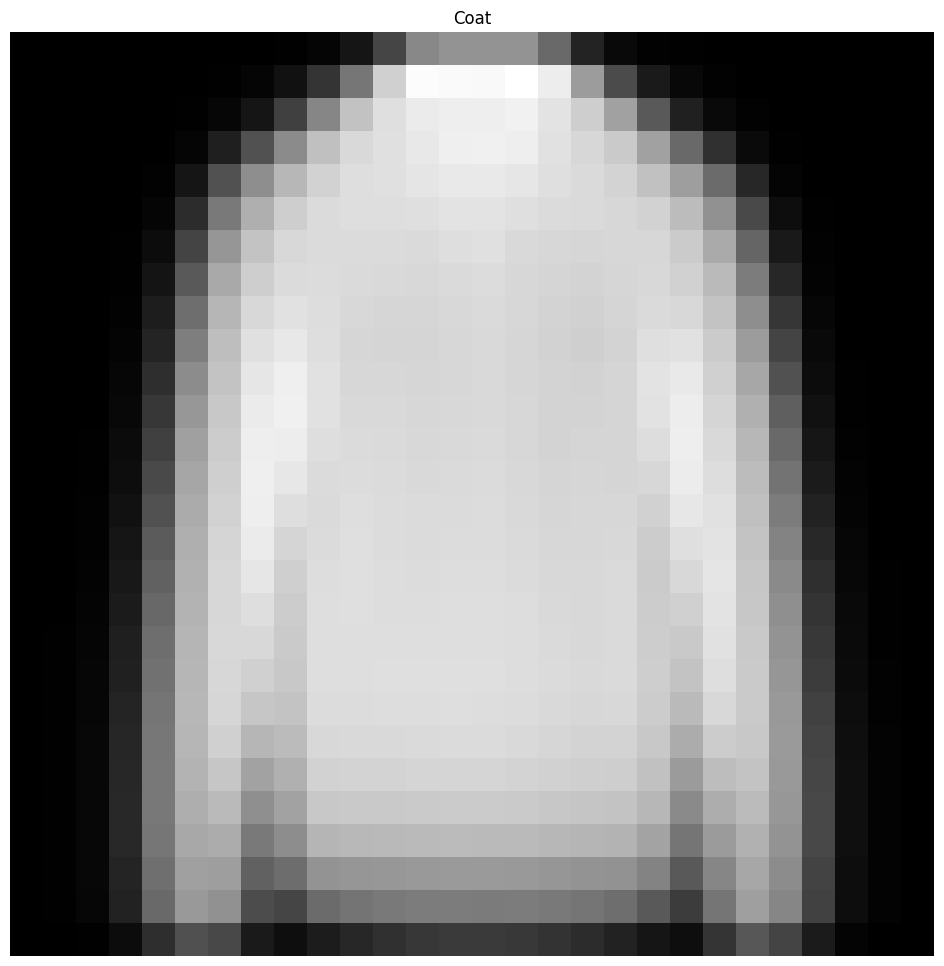

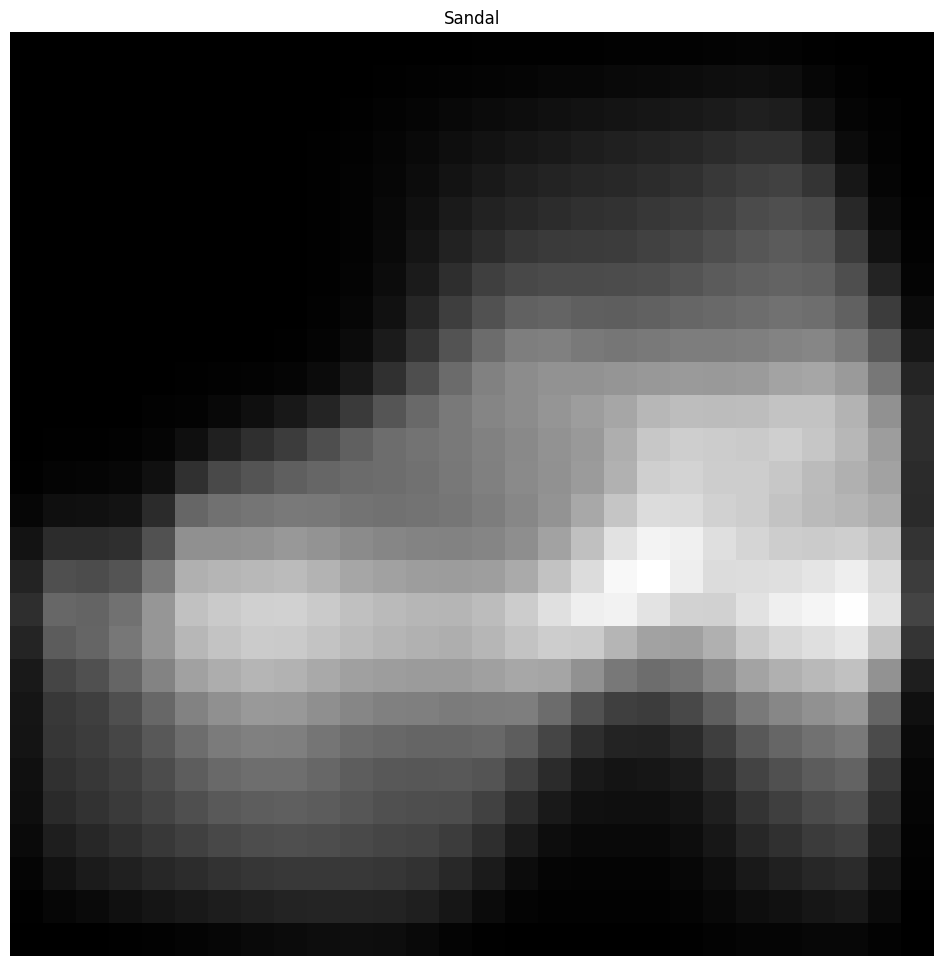

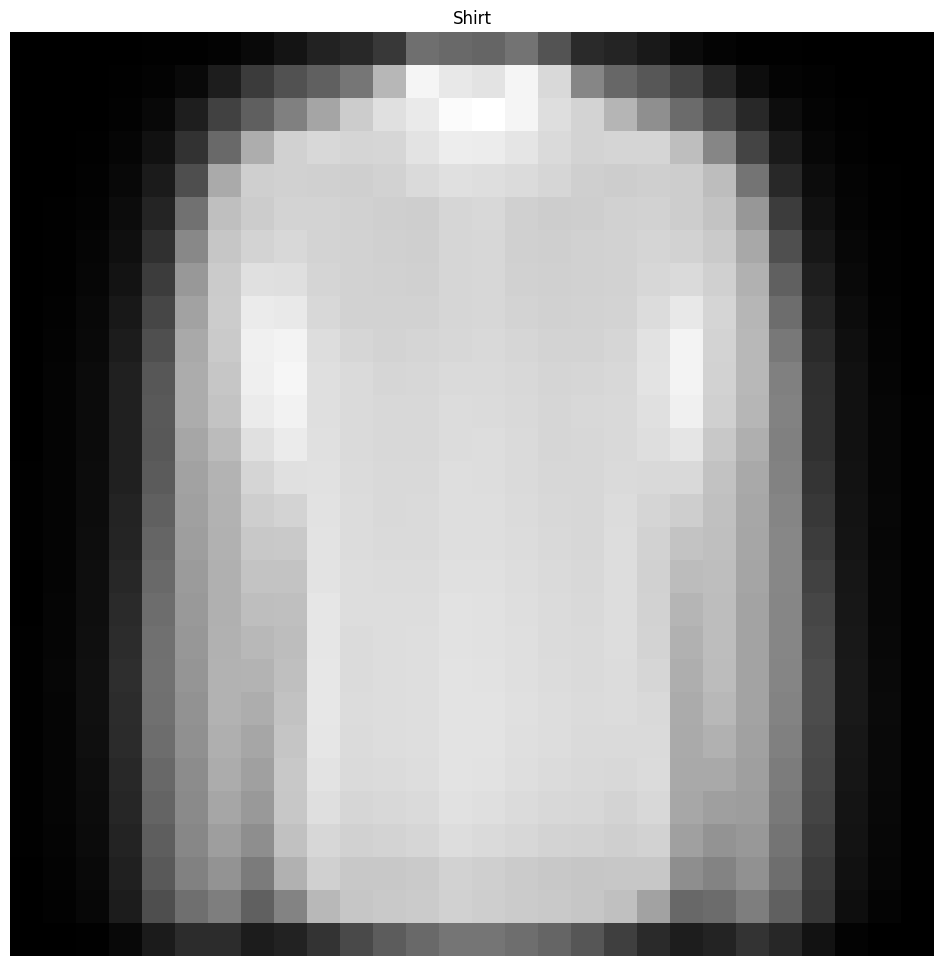

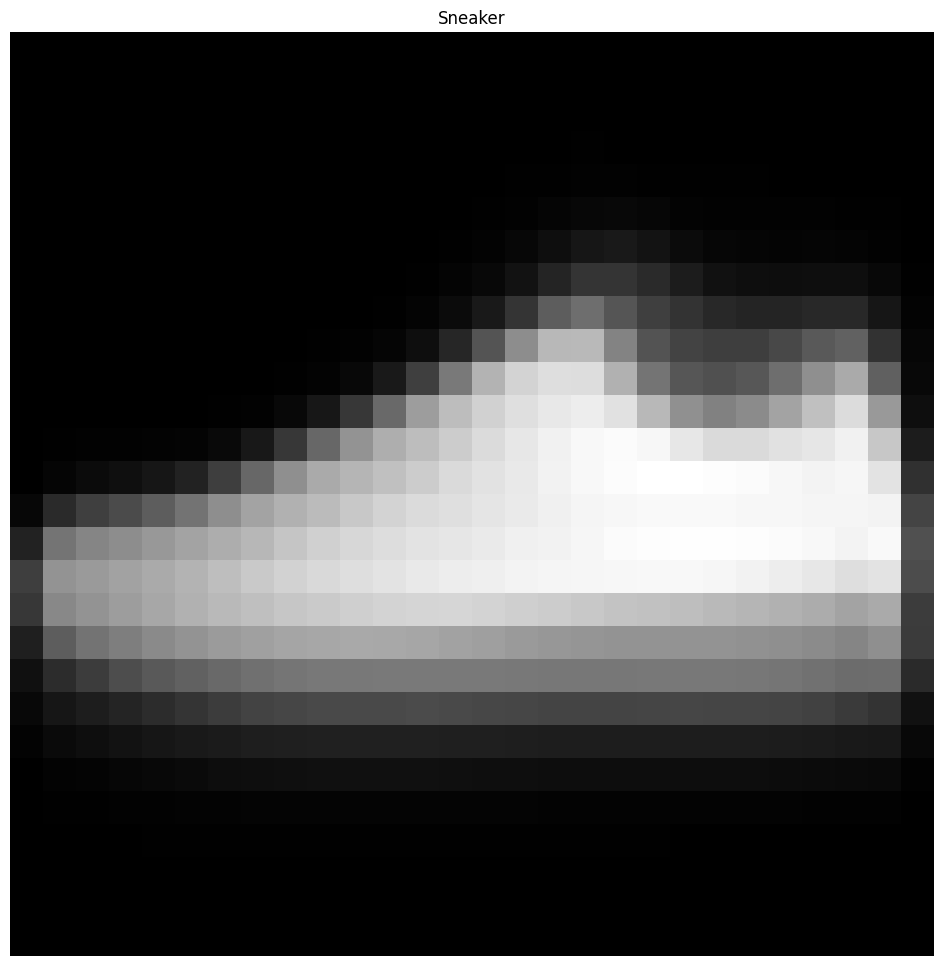

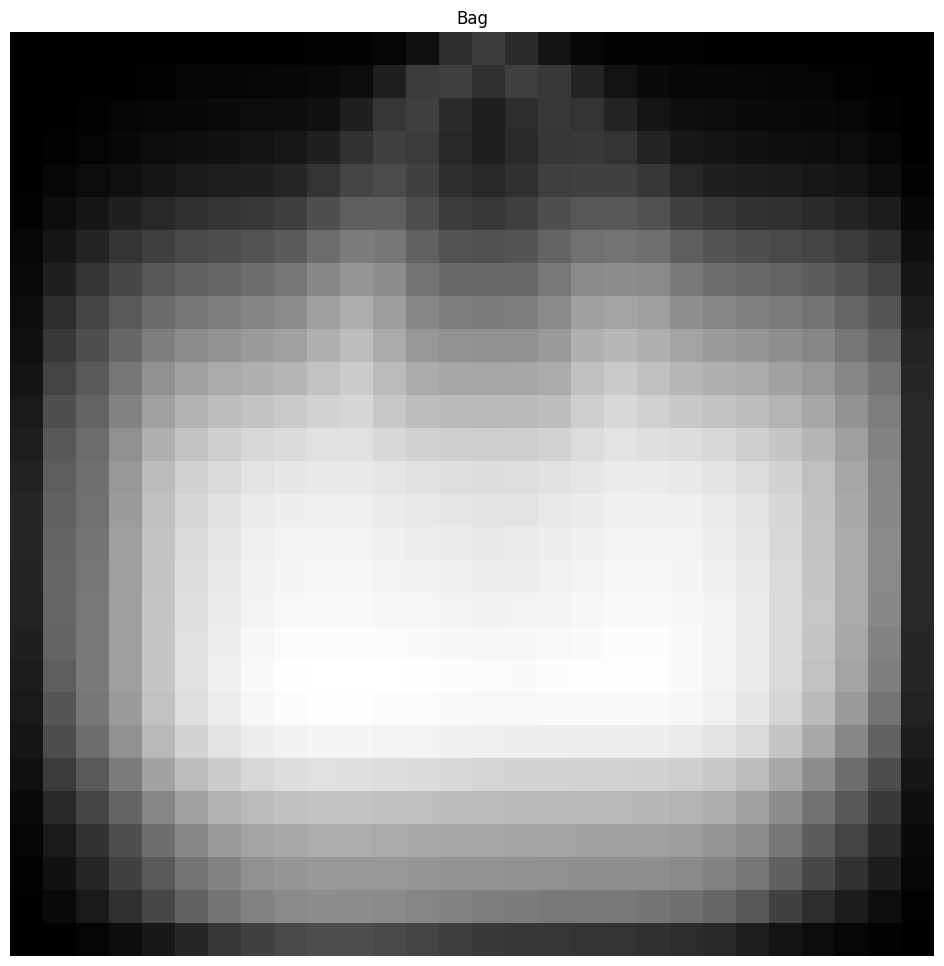

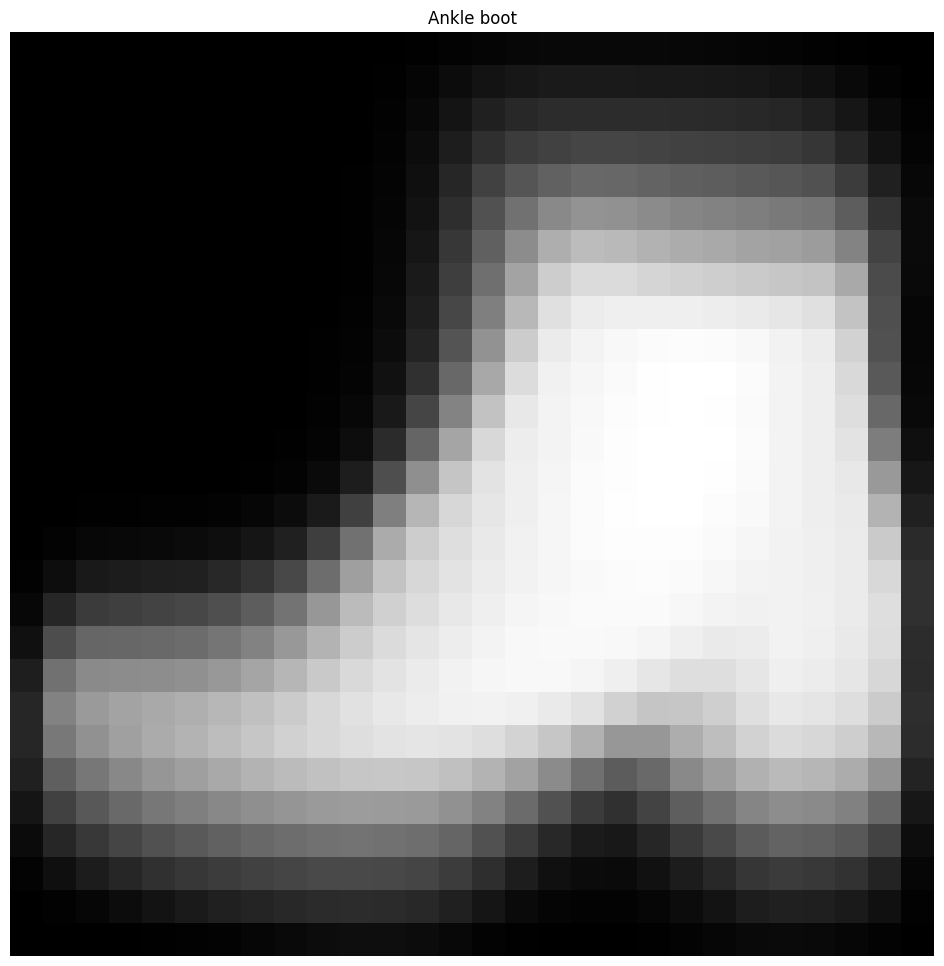

In [311]:
# Group the DataFrame by label and compute the mean of each group
average_images = X.groupby(y).mean()

for i, (label, avg_image) in enumerate(average_images.iterrows()):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    avg_image = avg_image.values.reshape(28, 28)
    ax.imshow(avg_image, cmap='gray')
    ax.set_title(label_names[label])
    ax.axis('off')
plt.show()

# Splitting the Data

In [312]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

X_test = test.drop('label', axis=1)
y_test = test['label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((51000, 784), (51000,), (10000, 784), (10000,))

For some of our models, we either neither reshape our features or encode our targets.

In [313]:
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_valid_reshaped = X_valid.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

In [314]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_valid_encoded = to_categorical(y_valid, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Modeling

## Model 1

For our first model, we will be using a fully-connected feedforward neural network using Keras and Tensorflow.

This model has 3 layers, densely connected of 512, 256, 10 neurons each.

For the optimizer we use RMSProp, for our loss function sparse_categorical_crossentropy, metrics is accuracy and a batch size of 128. 15 epochs will be used here.

In [315]:
model_1 = Sequential([
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [349]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 512)               401920    
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dense_51 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Define the Loss Function, Optimizer and Metrics

In [317]:
model_1.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

The code below is for storing the weights of the best epoch from the model. We are monitoring our model on each epoch based on its loss value on the validation data, we are storing the minimum value.

In [318]:
checkpoint_filepath_1 = 'best_model_1.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath_1,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Training the model

In [319]:
history_1 = model_1.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[model_checkpoint_callback_1])

Epoch 1/30
399/399 [==============================] - 5s 10ms/step - loss: 9.7969 - accuracy: 0.6945 - val_loss: 1.2417 - val_accuracy: 0.7338
Epoch 2/30
399/399 [==============================] - 4s 10ms/step - loss: 0.6629 - accuracy: 0.7780 - val_loss: 0.5545 - val_accuracy: 0.7898
Epoch 3/30
 42/399 [==>...........................] - ETA: 2s - loss: 0.5702 - accuracy: 0.8038

399/399 [==============================] - 4s 10ms/step - loss: 0.5489 - accuracy: 0.8108 - val_loss: 0.5522 - val_accuracy: 0.8120
Epoch 4/30
399/399 [==============================] - 3s 8ms/step - loss: 0.5039 - accuracy: 0.8284 - val_loss: 0.4686 - val_accuracy: 0.8421
Epoch 5/30
399/399 [==============================] - 4s 10ms/step - loss: 0.4814 - accuracy: 0.8378 - val_loss: 0.9252 - val_accuracy: 0.8013
Epoch 6/30
399/399 [==============================] - 4s 11ms/step - loss: 0.4681 - accuracy: 0.8452 - val_loss: 0.5190 - val_accuracy: 0.8221
Epoch 7/30
399/399 [==============================] - 4s 10ms/step - loss: 0.4450 - accuracy: 0.8498 - val_loss: 0.5925 - val_accuracy: 0.8316
Epoch 8/30
399/399 [==============================] - 4s 10ms/step - loss: 0.4492 - accuracy: 0.8520 - val_loss: 0.5773 - val_accuracy: 0.8039
Epoch 9/30
399/399 [==============================] - 4s 10ms/step - loss: 0.4380 - accuracy: 0.8585 - val_loss: 0.5353 - val_accuracy: 0.8412
Epoch 10/30

In [320]:
history_df = pd.DataFrame(history_1.history)
history_df.insert(0, 'epoch', range(1, len(history_df) + 1))
history_df

epoch      loss  accuracy  val_loss  val_accuracy
0       1  9.796870  0.694510  1.241742      0.733778
1       2  0.662902  0.777980  0.554514      0.789778
2       3  0.548888  0.810843  0.552249      0.812000
3       4  0.503886  0.828412  0.468595      0.842111
4       5  0.481366  0.837765  0.925247      0.801333
5       6  0.468073  0.845196  0.519026      0.822111
6       7  0.445037  0.849784  0.592467      0.831556
7       8  0.449163  0.852020  0.577267      0.803889
8       9  0.438003  0.858451  0.535297      0.841222
9      10  0.411582  0.863059  0.696391      0.821889
10     11  0.418083  0.864725  0.639816      0.843778
11     12  0.414078  0.866020  0.561473      0.850556
12     13  0.403976  0.869255  0.555955      0.847778
13     14  0.400137  0.870196  0.515232      0.865333
14     15  0.394013  0.872275  0.580041      0.862000
15     16  0.409792  0.872627  0.549476      0.872556
16     17  0.408325  0.872333  0.567466      0.846000
17     18  0.390085  0.873922  0.631346      0.837222
18     19  0.379657  0.876863  0.532066      0.866556
19     20  0.393910  0.878196  0.546908      0.873444
20     21  0.388228  0.877431  0.655506      0.870667
21     22  0.381061  0.879118  1.419081      0.774444
22     23  0.377641  0.878137  0.746038      0.858778
23     24  0.370366  0.881686  0.925939      0.805444
24     25  0.368318  0.882784  0.754765      0.854556
25     26  0.375898  0.882686  0.654565      0.845333
26     27  0.381638  0.882333  0.612225      0.872889
27     28  0.364552  0.884745  0.625162      0.872778
28     29  0.369764  0.884902  2.242268      0.764333
29     30  0.365469  0.887863  0.903953      0.856444

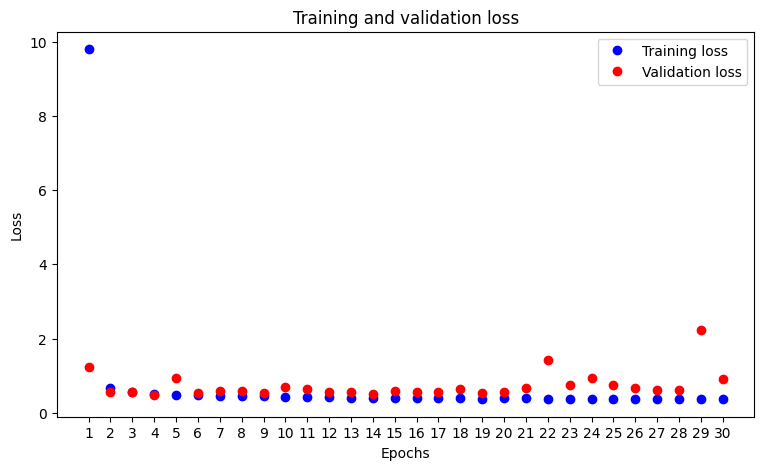

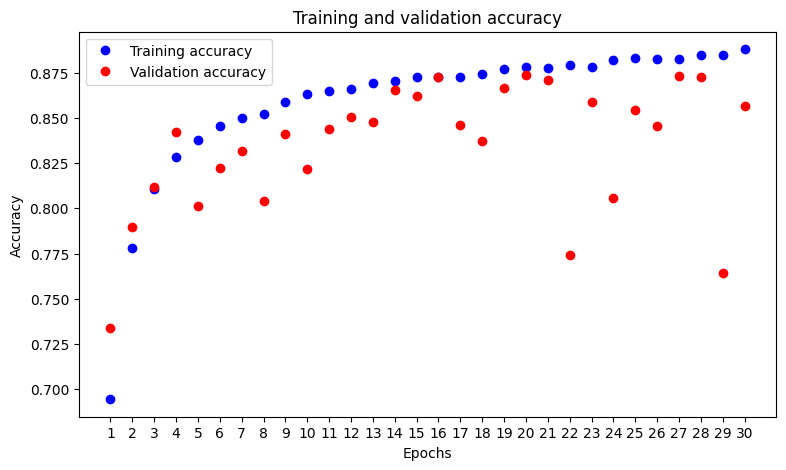

In [321]:
import matplotlib.pyplot as plt

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_1.history)

# Plot the training and validation loss
plt.figure(figsize=(9, 5))
values = history_df['accuracy']
epochs = range(1, len(values) + 1)
plt.plot(epochs, history_df['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_df['val_loss'], 'ro', label='Validation loss')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(9, 5))
plt.plot(epochs, history_df['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_df['val_accuracy'], 'ro', label='Validation accuracy')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

Visualizing with plotly because plotly allows us to hover on each marker.

In [322]:
import plotly.graph_objects as go

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_1.history)

epochs = list(range(1, len(history_df['loss']) + 1))

# Plot the training and validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['loss'], mode='lines+markers', name='Training loss'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_loss'], mode='lines+markers', name='Validation loss'))
fig.update_layout(title='Training and validation loss', xaxis_title='Epochs', yaxis_title='Loss', xaxis=dict(tickvals=epochs))
fig.show()

# Plot the training and validation accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['accuracy'], mode='lines+markers', name='Training accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_accuracy'], mode='lines+markers', name='Validation accuracy'))
fig.update_layout(title='Training and validation accuracy', xaxis_title='Epochs', yaxis_title='Accuracy', xaxis=dict(tickvals=epochs))
fig.show()

From the graphs, analyzing the performance on the validation set, we can see that our model had the highest accuracy score of 87.3% on epoch number 20 and had the lowest loss of 0.47 on epoch 4. We could also see that on the dataframe.

In [323]:
best_model_1 = load_model('best_model_1.hdf5')
best_model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 512)               401920    
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dense_51 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Model 2

For the second model, we will be using a fully-connected feedforward neural network using Keras and Tensorflow.

This model has 8 layers, densely connected of 1024, 512, 256, 128, 64, 32, 16 and 10 neurons each.

For the optimizer we use adam, for our loss function categorical_crossentropy, metrics is accuracy and a batch size of 128. We will also be running the model with 20 epochs.

In [324]:
model_2 = Sequential([
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [350]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1024)              803840    
                                                                 
 dense_53 (Dense)            (None, 512)               524800    
                                                                 
 dense_54 (Dense)            (None, 256)               131328    
                                                                 
 dense_55 (Dense)            (None, 128)               32896     
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)              

### Define the Loss Function, Optimizer and Metrics

In [326]:
model_2.compile(optimizer="adam",  # RMSProp is discussed in the Optimizers section
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [327]:
checkpoint_filepath_2 = 'best_model_2.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=checkpoint_filepath_2,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Training the model

In [328]:
history_2 = model_2.fit(X_train, y_train_encoded, epochs=30, batch_size=128, validation_data=(X_valid, y_valid_encoded), callbacks=[model_checkpoint_callback_2])

Epoch 1/30
398/399 [============================>.] - ETA: 0s - loss: 2.4151 - accuracy: 0.6828

399/399 [==============================] - 9s 19ms/step - loss: 2.4132 - accuracy: 0.6828 - val_loss: 0.6361 - val_accuracy: 0.7861
Epoch 2/30
399/399 [==============================] - 7s 18ms/step - loss: 0.5635 - accuracy: 0.8080 - val_loss: 0.5769 - val_accuracy: 0.7988
Epoch 3/30
399/399 [==============================] - 7s 18ms/step - loss: 0.4988 - accuracy: 0.8255 - val_loss: 0.4831 - val_accuracy: 0.8256
Epoch 4/30
399/399 [==============================] - 7s 18ms/step - loss: 0.4454 - accuracy: 0.8401 - val_loss: 0.4323 - val_accuracy: 0.8469
Epoch 5/30
399/399 [==============================] - 7s 17ms/step - loss: 0.4040 - accuracy: 0.8578 - val_loss: 0.4448 - val_accuracy: 0.8520
Epoch 6/30
399/399 [==============================] - 7s 18ms/step - loss: 0.3749 - accuracy: 0.8696 - val_loss: 0.3887 - val_accuracy: 0.8661
Epoch 7/30
399/399 [==============================] - 7s 18ms/step - loss: 0.3415 - accuracy: 0.8790 - val_loss: 0.3854 - val_accuracy: 0.8723
Epoch 8/30

In [329]:
history_df = pd.DataFrame(history_2.history)
history_df.insert(0, 'epoch', range(1, len(history_df) + 1))
history_df

epoch      loss  accuracy  val_loss  val_accuracy
0       1  2.413246  0.682804  0.636086      0.786111
1       2  0.563520  0.808039  0.576897      0.798778
2       3  0.498796  0.825510  0.483053      0.825556
3       4  0.445367  0.840059  0.432298      0.846889
4       5  0.404015  0.857804  0.444756      0.852000
5       6  0.374925  0.869608  0.388685      0.866111
6       7  0.341504  0.879020  0.385403      0.872333
7       8  0.335575  0.881804  0.376462      0.873889
8       9  0.324836  0.885059  0.374787      0.877111
9      10  0.309668  0.887941  0.365591      0.877778
10     11  0.298087  0.893412  0.380825      0.868222
11     12  0.293958  0.893863  0.391263      0.872222
12     13  0.290786  0.895451  0.376779      0.874333
13     14  0.282828  0.897549  0.342631      0.883778
14     15  0.277439  0.898765  0.365380      0.874222
15     16  0.268190  0.902667  0.350518      0.884444
16     17  0.269482  0.902510  0.342512      0.881556
17     18  0.257423  0.906451  0.336880      0.882556
18     19  0.250702  0.909843  0.356627      0.886222
19     20  0.241905  0.911608  0.349412      0.884222
20     21  0.240560  0.911529  0.359815      0.886778
21     22  0.231510  0.914627  0.385304      0.880000
22     23  0.237145  0.912627  0.345201      0.882889
23     24  0.229207  0.916490  0.359797      0.876667
24     25  0.217565  0.921000  0.364338      0.880111
25     26  0.218736  0.919471  0.355395      0.885333
26     27  0.219574  0.920373  0.356082      0.884778
27     28  0.207536  0.924451  0.368789      0.890222
28     29  0.203813  0.925941  0.375024      0.888333
29     30  0.200115  0.926353  0.367462      0.886889

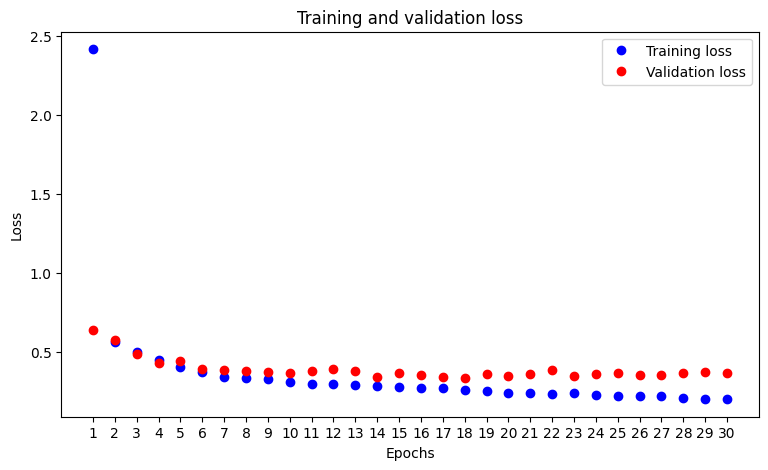

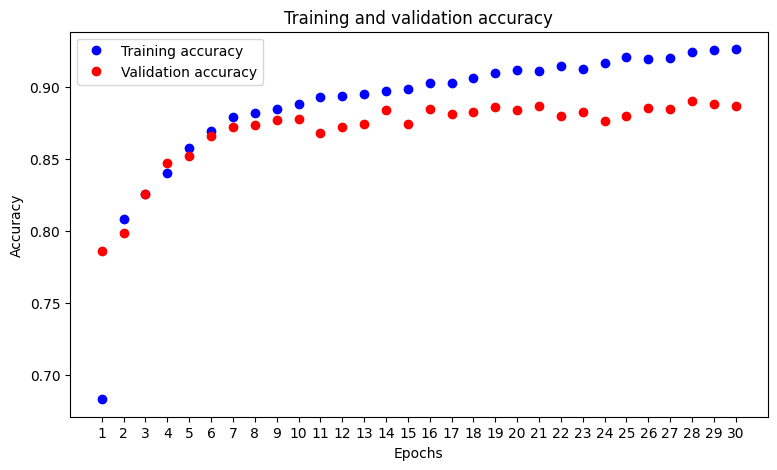

In [330]:
import matplotlib.pyplot as plt

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_2.history)

# Plot the training and validation loss
plt.figure(figsize=(9, 5))
values = history_df['accuracy']
epochs = range(1, len(values) + 1)
plt.plot(epochs, history_df['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_df['val_loss'], 'ro', label='Validation loss')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(9, 5))
plt.plot(epochs, history_df['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_df['val_accuracy'], 'ro', label='Validation accuracy')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

In [331]:
import plotly.graph_objects as go

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_2.history)

epochs = list(range(1, len(history_df['loss']) + 1))

# Plot the training and validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['loss'], mode='lines+markers', name='Training loss'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_loss'], mode='lines+markers', name='Validation loss'))
fig.update_layout(title='Training and validation loss', xaxis_title='Epochs', yaxis_title='Loss', xaxis=dict(tickvals=epochs))
fig.show()

# Plot the training and validation accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['accuracy'], mode='lines+markers', name='Training accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_accuracy'], mode='lines+markers', name='Validation accuracy'))
fig.update_layout(title='Training and validation accuracy', xaxis_title='Epochs', yaxis_title='Accuracy', xaxis=dict(tickvals=epochs))
fig.show()

From the graphs, analyzing the performance on the validation set, we can see that our model had the highest accuracy score of 89.02% on epoch number 28 and had the lowest loss of 0.336 on epoch 18. We could also see that on the dataframe.

In [332]:
best_model_2 = load_model('best_model_2.hdf5') 
best_model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1024)              803840    
                                                                 
 dense_53 (Dense)            (None, 512)               524800    
                                                                 
 dense_54 (Dense)            (None, 256)               131328    
                                                                 
 dense_55 (Dense)            (None, 128)               32896     
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)              

## Model 3

We will be using a Convolutional Neural Network Model with Keras and Tensorflow.

This model has takes the input in a shape of 28 by 28 and a depth of 1 because the images are in grayscale.

We have 6 hidden layers. For the optimizer we use RMSProp, for our loss function sparse_categorical_crossentropy, metrics is accuracy and a batch size of 128.

In [333]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_3 = keras.Model(inputs=inputs, outputs=outputs)

In [351]:
model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         7385

### Define the Loss Function, Optimizer and Metrics

In [335]:
model_3.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [336]:
checkpoint_filepath_3 = 'best_model_3.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=checkpoint_filepath_3,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

### Training the model

In [337]:
history_3 = model_3.fit(X_train_reshaped, y_train, epochs=30, batch_size=128, callbacks=[model_checkpoint_callback_3], validation_data=(X_valid_reshaped, y_valid))

Epoch 1/30
275/399 [===================>..........] - ETA: 3s - loss: 1.0991 - accuracy: 0.7668

399/399 [==============================] - 15s 37ms/step - loss: 0.8903 - accuracy: 0.7919 - val_loss: 0.4333 - val_accuracy: 0.8450
Epoch 2/30
399/399 [==============================] - 15s 38ms/step - loss: 0.3508 - accuracy: 0.8734 - val_loss: 0.3293 - val_accuracy: 0.8847
Epoch 3/30
399/399 [==============================] - 15s 37ms/step - loss: 0.3005 - accuracy: 0.8905 - val_loss: 0.3814 - val_accuracy: 0.8610
Epoch 4/30
399/399 [==============================] - 15s 39ms/step - loss: 0.2657 - accuracy: 0.9025 - val_loss: 0.3213 - val_accuracy: 0.8828
Epoch 5/30
399/399 [==============================] - 15s 38ms/step - loss: 0.2398 - accuracy: 0.9116 - val_loss: 0.3603 - val_accuracy: 0.8836
Epoch 6/30
399/399 [==============================] - 15s 37ms/step - loss: 0.2182 - accuracy: 0.9211 - val_loss: 0.3158 - val_accuracy: 0.8970
Epoch 7/30
399/399 [==============================] - 15s 37ms/step - loss: 0.1987 - accuracy: 0.9263 - val_loss: 0.3671 - val_accuracy: 0.8876
Epo

In [338]:
history_df = pd.DataFrame(history_3.history)
history_df.insert(0, 'epoch', range(1, len(history_df) + 1))
history_df

epoch      loss  accuracy  val_loss  val_accuracy
0       1  0.890284  0.791902  0.433285      0.845000
1       2  0.350794  0.873431  0.329270      0.884667
2       3  0.300475  0.890451  0.381365      0.861000
3       4  0.265687  0.902549  0.321262      0.882778
4       5  0.239770  0.911647  0.360256      0.883556
5       6  0.218153  0.921059  0.315825      0.897000
6       7  0.198679  0.926275  0.367142      0.887556
7       8  0.186387  0.932039  0.364977      0.893667
8       9  0.171877  0.936333  0.421542      0.883889
9      10  0.160040  0.942549  0.416389      0.890889
10     11  0.149972  0.945412  0.424631      0.890889
11     12  0.141481  0.948137  0.401975      0.894778
12     13  0.134318  0.952137  0.448645      0.893333
13     14  0.126950  0.953412  0.454687      0.891444
14     15  0.123211  0.955490  0.436586      0.893556
15     16  0.116897  0.959431  0.619108      0.889556
16     17  0.112024  0.960804  0.549782      0.890667
17     18  0.109617  0.961431  0.543228      0.886000
18     19  0.106127  0.963647  0.636125      0.888222
19     20  0.104380  0.964686  0.601853      0.885444
20     21  0.098598  0.966412  0.649905      0.885111
21     22  0.103441  0.964686  0.770655      0.886000
22     23  0.099109  0.967471  0.688911      0.892444
23     24  0.099088  0.967569  0.751750      0.893222
24     25  0.094237  0.969020  0.748669      0.886333
25     26  0.094511  0.969667  0.820575      0.883111
26     27  0.095087  0.969843  0.818096      0.885667
27     28  0.091384  0.970431  0.770671      0.887000
28     29  0.092366  0.970588  0.852918      0.889222
29     30  0.087999  0.971804  0.820642      0.889778

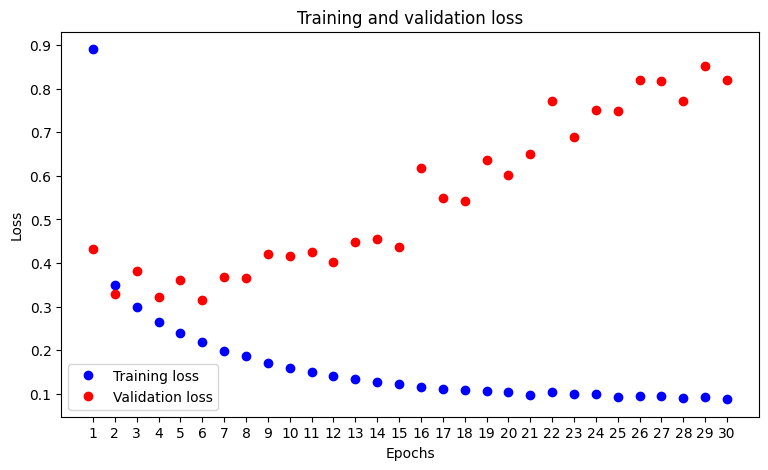

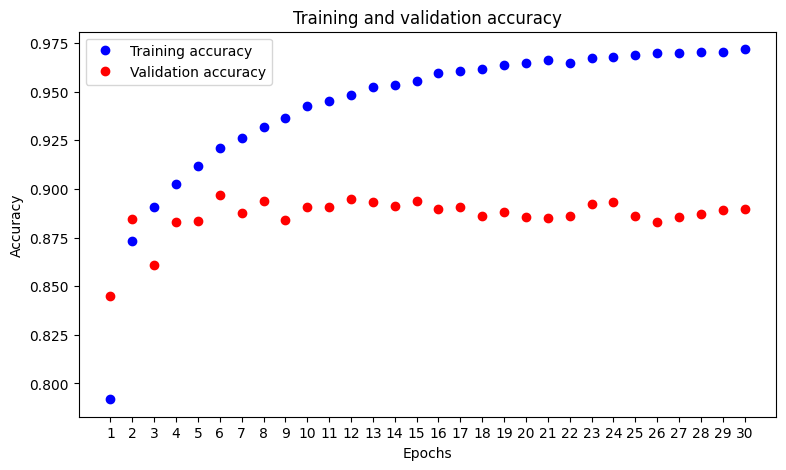

In [339]:
import matplotlib.pyplot as plt

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_3.history)

# Plot the training and validation loss
plt.figure(figsize=(9, 5))
values = history_df['accuracy']
epochs = range(1, len(values) + 1)
plt.plot(epochs, history_df['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_df['val_loss'], 'ro', label='Validation loss')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(9, 5))
plt.plot(epochs, history_df['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_df['val_accuracy'], 'ro', label='Validation accuracy')

plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

In [340]:
import plotly.graph_objects as go

# Create a DataFrame from the history object
history_df = pd.DataFrame(history_3.history)

epochs = list(range(1, len(history_df['loss']) + 1))

# Plot the training and validation loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['loss'], mode='lines+markers', name='Training loss'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_loss'], mode='lines+markers', name='Validation loss'))
fig.update_layout(title='Training and validation loss', xaxis_title='Epochs', yaxis_title='Loss', xaxis=dict(tickvals=epochs))
fig.show()

# Plot the training and validation accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history_df['accuracy'], mode='lines+markers', name='Training accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=history_df['val_accuracy'], mode='lines+markers', name='Validation accuracy'))
fig.update_layout(title='Training and validation accuracy', xaxis_title='Epochs', yaxis_title='Accuracy', xaxis=dict(tickvals=epochs))
fig.show()

From the graphs, analyzing the performance on the validation set, we can see that our model had the highest accuracy score of 89.7% on epoch number 6 and had the lowest loss of 0.316 on epoch 6. We could also see that on the dataframe.

In [341]:
best_model_3 = load_model('best_model_3.hdf5')
best_model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         7385

### Bonus Model

This is the model I used in my lab 7 and I wanted to see how it would perform on this dataset.

In [342]:
modelcnn = Sequential([
    
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=192, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(filters=192, kernel_size=5, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),
    
    layers.Flatten(),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])
    

In [352]:
modelcnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 192)       221376    
                                                     

In [344]:
from keras.callbacks import ReduceLROnPlateau

In [348]:
modelcnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)

history = modelcnn.fit(
    X_train_reshaped, y_train_encoded, 
    epochs=3,
    batch_size=128,
    callbacks=[reduce_lr],
    validation_data=(X_valid_reshaped, y_valid_encoded)
)

Epoch 1/3


399/399 [==============================] - 225s 559ms/step - loss: 0.2006 - accuracy: 0.9270 - val_loss: 0.2156 - val_accuracy: 0.9213 - lr: 0.0010
Epoch 2/3
399/399 [==============================] - 222s 556ms/step - loss: 0.1652 - accuracy: 0.9387 - val_loss: 0.2125 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 3/3
399/399 [==============================] - 219s 550ms/step - loss: 0.1411 - accuracy: 0.9486 - val_loss: 0.2296 - val_accuracy: 0.9199 - lr: 0.0010


It is rather interesting to see the accuracy it got on the validation after only 2 epochs and a batch size of 128, compared to the other 3 models we considered.

## Choosing The Best Model

After fitting our 3 different models and choosing the best weights from each, let us manually predict our validation with them to choose the best model out of all 3.

### Model 1

In [353]:
y_valid_pred_1 = best_model_1.predict(X_valid)

  1/282 [..............................] - ETA: 11s

282/282 [==============================] - 1s 2ms/step


In [354]:
# Get the maximum predicted probability for each sample
max_probs = np.max(y_valid_pred_1, axis=1)

# Convert the model's probability outputs to class labels
y_valid_pred_labels_1 = np.argmax(y_valid_pred_1, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted label': max_probs,
    'Actual prediction by the model': y_valid_pred_labels_1,
    'Ground truth': y_valid
})

display(df)

Probability of predicting the predicted label   
3048                                        1.000000  \
19563                                       0.992152   
58303                                       0.996077   
8870                                        0.977534   
40228                                       0.633317   
...                                              ...   
30581                                       0.451651   
46746                                       0.952006   
9069                                        0.668585   
25232                                       0.992030   
27183                                       0.496652   

       Actual prediction by the model  Ground truth  
3048                                1             1  
19563                               6             6  
58303                               8             8  
8870                                7             7  
40228                               0             0  
...                               ...           ...  
30581                               4             2  
46746                               8             8  
9069                                9             9  
25232                               9             9  
27183                               4             2  

[9000 rows x 3 columns]

In [355]:
accuracy = accuracy_score(y_valid, y_valid_pred_labels_1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8421111111111111


### Model 2

In [356]:
y_valid_pred_2 = best_model_2.predict(X_valid)

282/282 [==============================] - 1s 3ms/step


In [357]:
# Get the maximum predicted probability for each sample
max_probs = np.max(y_valid_pred_2, axis=1)

# Convert the model's probability outputs to class labels
y_valid_pred_labels_2 = np.argmax(y_valid_pred_2, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted label': max_probs,
    'Actual prediction by the model': y_valid_pred_labels_2,
    'Ground truth': y_valid
})

display(df)

Probability of predicting the predicted label   
3048                                        1.000000  \
19563                                       0.996581   
58303                                       0.999660   
8870                                        0.973894   
40228                                       0.671597   
...                                              ...   
30581                                       0.563368   
46746                                       0.979309   
9069                                        0.826520   
25232                                       0.999177   
27183                                       0.731832   

       Actual prediction by the model  Ground truth  
3048                                1             1  
19563                               6             6  
58303                               8             8  
8870                                7             7  
40228                               6             0  
...                               ...           ...  
30581                               4             2  
46746                               8             8  
9069                                9             9  
25232                               9             9  
27183                               4             2  

[9000 rows x 3 columns]

In [358]:
accuracy = accuracy_score(y_valid, y_valid_pred_labels_2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8825555555555555


### Model 3

In [359]:
y_valid_pred_3 = best_model_3.predict(X_valid_reshaped)

282/282 [==============================] - 1s 4ms/step


In [360]:
# Get the maximum predicted probability for each sample
max_probs = np.max(y_valid_pred_3, axis=1)

# Convert the model's probability outputs to class labels
y_valid_pred_labels_3 = np.argmax(y_valid_pred_3, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted label': max_probs,
    'Actual prediction by the model': y_valid_pred_labels_3,
    'Ground truth': y_valid
})

display(df)

Probability of predicting the predicted label   
3048                                        0.999999  \
19563                                       0.945360   
58303                                       0.999999   
8870                                        0.732669   
40228                                       0.858999   
...                                              ...   
30581                                       0.671416   
46746                                       0.984090   
9069                                        0.968968   
25232                                       0.999996   
27183                                       0.677986   

       Actual prediction by the model  Ground truth  
3048                                1             1  
19563                               6             6  
58303                               8             8  
8870                                7             7  
40228                               0             0  
...                               ...           ...  
30581                               2             2  
46746                               8             8  
9069                                9             9  
25232                               9             9  
27183                               4             2  

[9000 rows x 3 columns]

In [361]:
accuracy = accuracy_score(y_valid, y_valid_pred_labels_3)
print(f'Accuracy: {accuracy}')

Accuracy: 0.897


In [362]:
# make a table of the results
results = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Accuracy': [accuracy_score(y_valid, y_valid_pred_labels_1), accuracy_score(y_valid, y_valid_pred_labels_2), accuracy_score(y_valid, y_valid_pred_labels_3)]
})

results

Model  Accuracy
0  Model 1  0.842111
1  Model 2  0.882556
2  Model 3  0.897000

# Evaluation

We compare the accuracy scores across all the models and choose the best as our best model.

In [363]:
best_model = best_model_1 if accuracy_score(y_valid, y_valid_pred_labels_1) > accuracy_score(y_valid, y_valid_pred_labels_2) else best_model_2 if accuracy_score(y_valid, y_valid_pred_labels_2) > accuracy_score(y_valid, y_valid_pred_labels_3) else best_model_3
best_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         7385

We can see how each model performed on the validation test, our model 3, a convolutional nueral network model had the best performance out of all our models.

This is also interesting because looking at the summaries of all models, the model 3 doesn't have as much trainiable parameters as model 1 and model 2. So, maybe the more parameters it has to compute, the less it actually gets the best value for each parameter? hmm.

## Test Set Evaluation

In [372]:
#predict the test set
y_test_pred = best_model.predict(X_test_reshaped)

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 1s 4ms/step


In [373]:
max_probs = np.max(y_test_pred, axis=1)

y_test_pred_labels = np.argmax(y_test_pred, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted digit': max_probs,
    'Actual prediction by the model': y_test_pred_labels,
    'Ground truth': y_test
})

# Display the DataFrame
display(df)

Probability of predicting the predicted digit   
0                                          0.928628  \
1                                          0.999999   
2                                          0.930958   
3                                          0.986842   
4                                          0.924560   
...                                             ...   
9995                                       0.972546   
9996                                       0.372464   
9997                                       1.000000   
9998                                       0.994278   
9999                                       0.909439   

      Actual prediction by the model  Ground truth  
0                                  0             0  
1                                  1             1  
2                                  2             2  
3                                  6             2  
4                                  3             3  
...                              ...           ...  
9995                               0             0  
9996                               6             6  
9997                               8             8  
9998                               8             8  
9999                               1             1  

[10000 rows x 3 columns]

## Accuracy

In [374]:
accuracy = accuracy_score(y_test, y_test_pred_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9007


We were able to achieve an accuracy of 90% on our test set using our best model, which is very impressive, given the amount of noise in the dataset.

## Confusion Matrix

In [375]:
conf_mat = confusion_matrix(y_test, y_test_pred_labels)
print(f'Confusion matrix:\n {conf_mat}')

Confusion matrix:
 [[897   1  22  14   2   1  57   0   6   0]
 [  3 971   5  16   1   1   2   0   1   0]
 [ 15   0 851   9  70   1  49   0   5   0]
 [ 19   1   8 931  22   0  16   0   3   0]
 [  3   0  74  26 846   0  49   0   1   1]
 [  0   1   0   0   0 978   0  13   1   7]
 [152   3  89  34  76   0 634   0  12   0]
 [  0   0   0   0   0  19   0 937   0  44]
 [  1   0   4   1   2   3   3   0 985   1]
 [  0   0   0   0   0   2   0  21   0 977]]


## Precision, Recall and F1

In [376]:
# Compute precision, recall, F1-score
report = classification_report(y_test, y_test_pred_labels)
report_df = pd.DataFrame(classification_report(y_test, y_test_pred_labels, output_dict=True)).T
display(report_df)

precision  recall  f1-score     support
0              0.822936  0.8970  0.858373   1000.0000
1              0.993859  0.9710  0.982296   1000.0000
2              0.808167  0.8510  0.829031   1000.0000
3              0.903007  0.9310  0.916790   1000.0000
4              0.830226  0.8460  0.838039   1000.0000
5              0.973134  0.9780  0.975561   1000.0000
6              0.782716  0.6340  0.700552   1000.0000
7              0.964985  0.9370  0.950786   1000.0000
8              0.971400  0.9850  0.978153   1000.0000
9              0.948544  0.9770  0.962562   1000.0000
accuracy       0.900700  0.9007  0.900700      0.9007
macro avg      0.899897  0.9007  0.899214  10000.0000
weighted avg   0.899897  0.9007  0.899214  10000.0000

## Precision Recall Curve

We will use class 5 now because we will also be needing it later.

In [377]:
y_scores = y_test_pred[:, 5]

y_test_is_5 = (y_test == 5)

In [378]:
precisions, recalls, thresholds = precision_recall_curve(y_test_is_5, y_scores)

In [379]:
threshold = 0.4

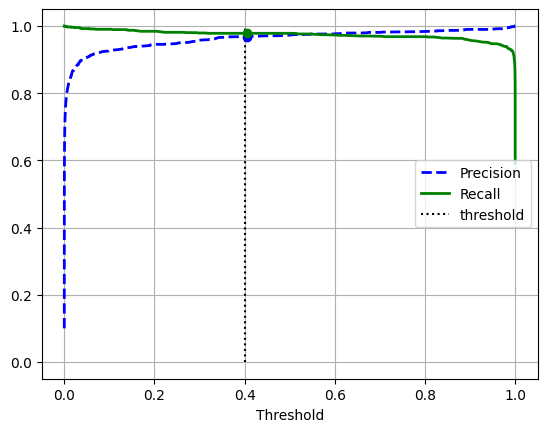

In [380]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)


plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")


plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.grid(True)
plt.show()

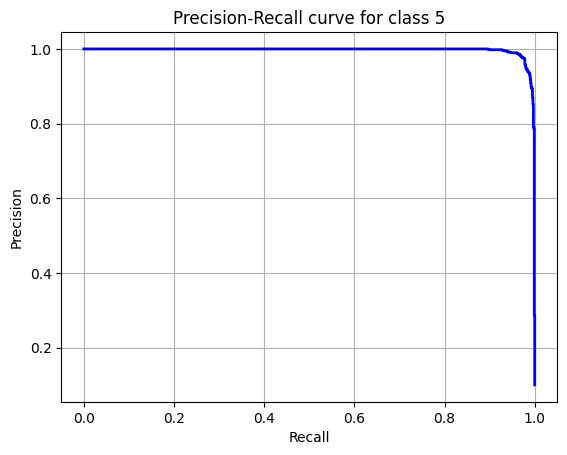

In [381]:
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title('Precision-Recall curve for class 5')
plt.show()

## Increasing Precision and Recall

To increase precision or recall without retraining the model, we can adjust the decision threshold. By default, the threshold is 0.5 for binary classification: probabilities above 0.5 are classified as positive, and those below are classified as negative. If we decrease the threshold, we can classify more samples as positive, which will increase recall which may decrease precision. If we increase the threshold, we'll classify fewer samples as positive, which will increase precision but may decrease recall.

In [382]:
y_scores = y_test_pred[:, 5]

y_test_is_5 = (y_test == 5)

Let's see this in action.

In [383]:
high_threshold = 0.90
y_pred_high_threshold = (y_scores > high_threshold)
high_precision = precision_score(y_test_is_5, y_pred_high_threshold)
new_recall = recall_score(y_test_is_5, y_pred_high_threshold)
print(f'Precision with high threshold: {high_precision}')
print(f'Recall with high threshold: {new_recall}')

Precision with high threshold: 0.9896587383660806
Recall with high threshold: 0.957


In [384]:
# Choose a lower threshold to increase recall
low_threshold = 0.3
y_pred_low_threshold = (y_scores > low_threshold)
high_recall = recall_score(y_test_is_5, y_pred_low_threshold)
new_precision = precision_score(y_test_is_5, y_pred_low_threshold)
print(f'Recall with low threshold: {high_recall}')
print(f'Precision with low threshold: {new_precision}')

Recall with low threshold: 0.979
Precision with low threshold: 0.9579256360078278


For our test set for class 5, we initally had a precision score of `0.973` and a recall score of `0.978`. But as you can see, by increasing our threshold, we were able to raise the precision score to `0.989`, and then when we reduced the threshold, we increased our recall score to `0.979`.